In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = True

apply_scaffold_split = False

create_new_data = False

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "GNN"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_regression_random_gnn/model_gnn_conv"
    else:
        filename_basic = "results_regression_random_fp/model_fp"
else:
    if not use_fingerprints:
        filename_basic = "results_regression_scaffold_gnn/model_gnn_conv"
    else:
        filename_basic = "results_regression_scaffold_fp/model_fp"

apply_scaffold_split = False

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [6]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512], [512, 256]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:
batch_size = 64

In [10]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [1, 2, 3, 4]
    param_combinations_fp["fpSize"] = [1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [11]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [12]:
print(len(combinations))

64


run: 0
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8998E50>, <torch.utils.data.dataset.Subset object at 0x00000224F9FCA130>, <torch.utils.data.dataset.Subset object at 0x00000224F9FCA9A0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.781309191385905 | Validation Loss 1.345197319984436
Epoch 10 | Train Loss 0.1452896624803543 | Validation Loss 0.5018877387046814
Epoch 20 | Train Loss 0.07021621416012445 | Validation Loss 0.5452572405338287
Epoch 30 | Train Loss 0.04275810346007347 | Validation Loss 0.5802181959152222
Epoch 40 | Train Loss 0.04749962985515595 | Validation Loss 0.5707715749740601
Epoch 50 | Train Loss 0.03684477371474107 | Validation Loss 0.5532242059707642


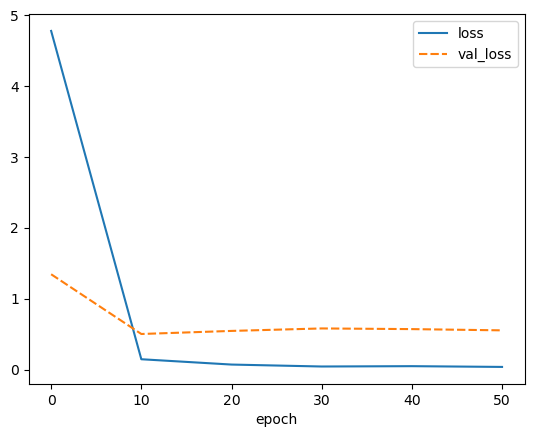

best weights loaded


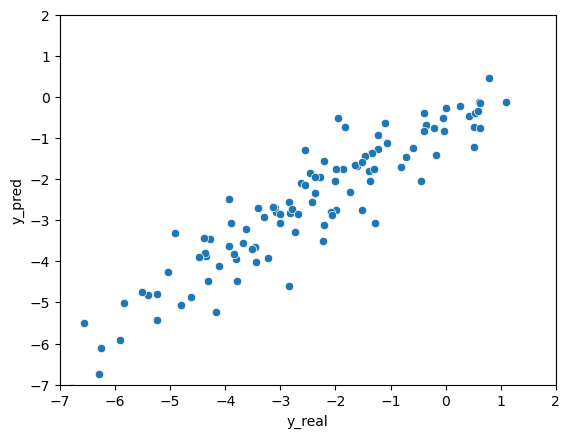

elapsed time: 6.929111003875732
run: 1
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8A4F3A0>, <torch.utils.data.dataset.Subset object at 0x00000225573FDBB0>, <torch.utils.data.dataset.Subset object at 0x00000225573FD9A0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 7.39523450533549 | Validation Loss 5.5842649936676025
Epoch 10 | Train Loss 0.5413868288199107 | Validation Loss 1.630723476409912
Epoch 20 | Train Loss 0.3346595933039983 | Validation Loss 1.4099491834640503
Epoch 30 | Train Loss 0.23422169138987858 | Validation Loss 1.4721348881721497
Epoch 40 | Train Loss 0.2083922306696574 | Validation Loss 1.4663392305374146
Epoch 50 | Train Loss 0.18631517936786016 | Validation Loss 1.4037531614303589
Epoch 60 | Train Loss 0.20603602702418963 | Validation Loss 1.4191229343414307
Epoch 70 | Train Loss 0.18639397180328768 | Validation Loss 1.4460320472717285
Epoch 80 | Train Loss 0.17343346402049065 | Validation Loss 1.4024165868759155
Epoch 90 | Train Loss 0.16689278036355973 | Validation Loss 1.4306804239749908
Epoch 100 | Train Loss 0.1690266016870737 | Validation Loss 1.375991940498352
Epoch 110 | Train Loss 0.15350057990290225 | Validation Loss 1.3499611020088196
Epoch 120 | Train Loss 0.16909275303284327 | Validation Loss

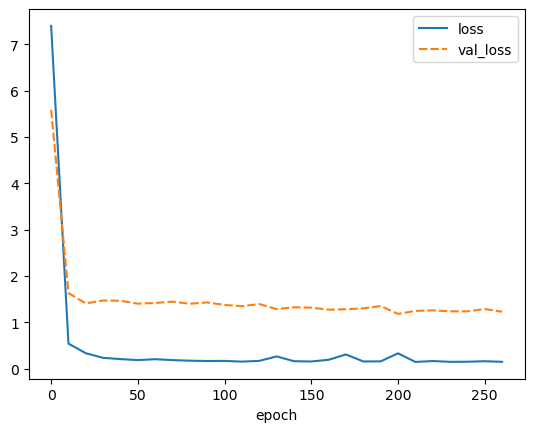

best weights loaded


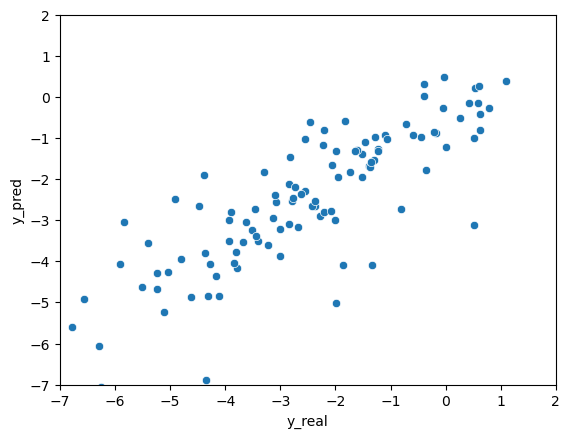

elapsed time: 13.692472696304321
run: 2
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8A18610>, <torch.utils.data.dataset.Subset object at 0x00000224F8AFAF70>, <torch.utils.data.dataset.Subset object at 0x00000224F8AFA340>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.7980190674463907 | Validation Loss 1.8834659457206726
Epoch 10 | Train Loss 0.14192205021778742 | Validation Loss 0.5696513056755066
Epoch 20 | Train Loss 0.07945740918318431 | Validation Loss 0.6321186423301697
Epoch 30 | Train Loss 0.1277069946130117 | Validation Loss 0.5136677324771881
Epoch 40 | Train Loss 0.04244019612669945 | Validation Loss 0.5282869338989258
Epoch 50 | Train Loss 0.024553729593753813 | Validation Loss 0.5144160985946655
Epoch 60 | Train Loss 0.1304342639942964 | Validation Loss 0.5519169270992279
Epoch 70 | Train Loss 0.031349595574041204 | Validation Loss 0.5077769607305527
Epoch 80 | Train Loss 0.020261349513505895 | Validation Loss 0.48748351633548737
Epoch 90 | Train Loss 0.03472939506173134 | Validation Loss 0.5006236433982849
Epoch 100 | Train Loss 0.029928435881932575 | Validation Loss 0.5958025753498077
Epoch 110 | Train Loss 0.020764226093888283 | Validation Loss 0.490898922085762


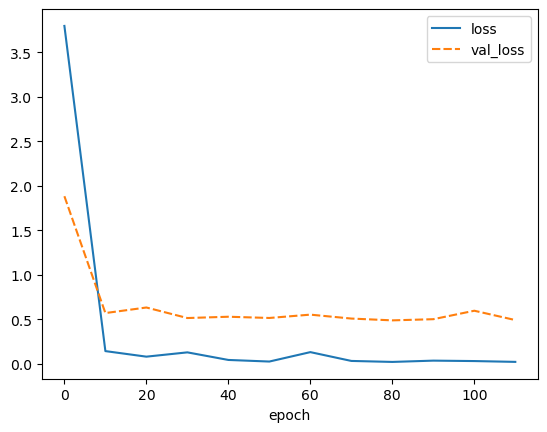

best weights loaded


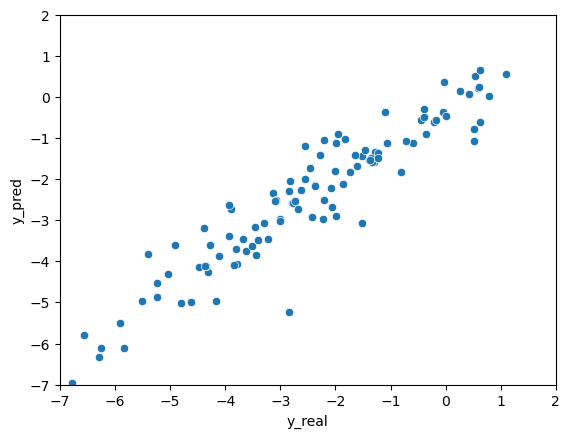

elapsed time: 9.599847078323364
run: 3
{'radius': 1, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8B7DC10>, <torch.utils.data.dataset.Subset object at 0x000002255F9222E0>, <torch.utils.data.dataset.Subset object at 0x000002255F9296D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.064890909194946 | Validation Loss 2.834340214729309
Epoch 10 | Train Loss 0.39979852040608727 | Validation Loss 1.5783029794692993
Epoch 20 | Train Loss 0.23185575505097708 | Validation Loss 1.4517019391059875
Epoch 30 | Train Loss 0.3816849172115326 | Validation Loss 1.6042761206626892
Epoch 40 | Train Loss 0.259061673283577 | Validation Loss 1.2611289024353027
Epoch 50 | Train Loss 0.25546130587657295 | Validation Loss 1.276804268360138
Epoch 60 | Train Loss 0.16005040697442988 | Validation Loss 1.2572912573814392
Epoch 70 | Train Loss 0.31811148424943286 | Validation Loss 1.255524456501007


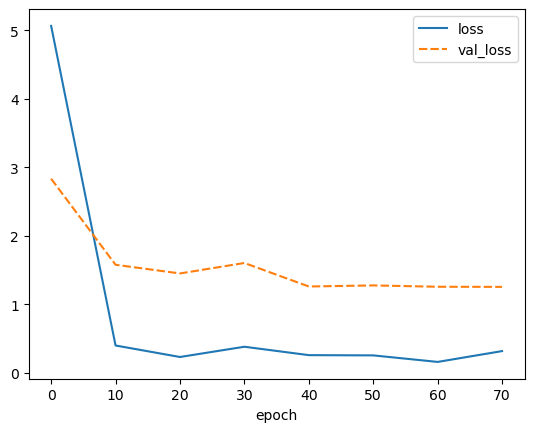

best weights loaded


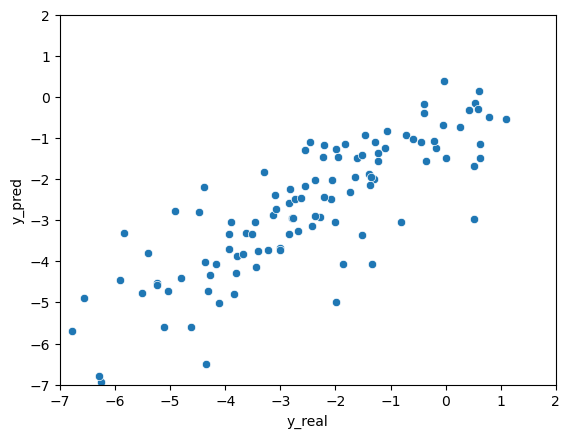

elapsed time: 6.448637008666992
run: 4
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F89BC3D0>, <torch.utils.data.dataset.Subset object at 0x000002255FA46670>, <torch.utils.data.dataset.Subset object at 0x000002255FA465B0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.226031676928202 | Validation Loss 2.318110167980194
Epoch 10 | Train Loss 0.1599162648121516 | Validation Loss 0.5633456707000732
Epoch 20 | Train Loss 0.07056950479745865 | Validation Loss 0.5775294899940491
Epoch 30 | Train Loss 0.03486246091003219 | Validation Loss 0.5467328429222107
Epoch 40 | Train Loss 0.08870694587628046 | Validation Loss 0.5247613787651062
Epoch 50 | Train Loss 0.03528572345773379 | Validation Loss 0.5107143968343735
Epoch 60 | Train Loss 0.01867816566179196 | Validation Loss 0.548798456788063
Epoch 70 | Train Loss 0.02677516210824251 | Validation Loss 0.5031420886516571
Epoch 80 | Train Loss 0.020369427092373372 | Validation Loss 0.5482130646705627
Epoch 90 | Train Loss 0.038133628045519195 | Validation Loss 0.5050168186426163
Epoch 100 | Train Loss 0.011885310802608729 | Validation Loss 0.4750804305076599
Epoch 110 | Train Loss 0.03585132428755363 | Validation Loss 0.4957258999347687
Epoch 120 | Train Loss 0.012601123610511421 | Validat

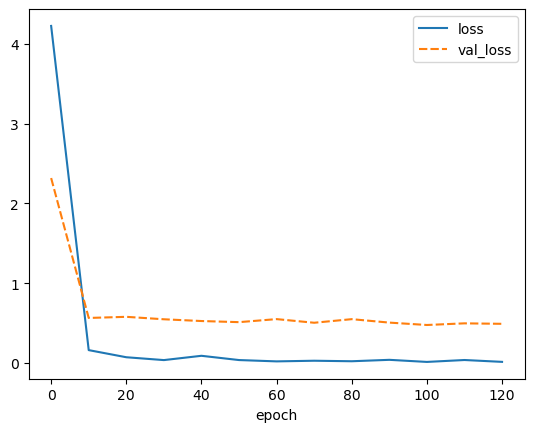

best weights loaded


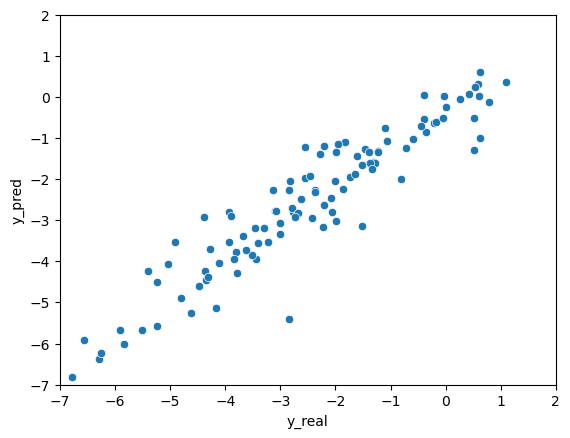

elapsed time: 8.57856559753418
run: 5
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8D0F040>, <torch.utils.data.dataset.Subset object at 0x0000022555F37B80>, <torch.utils.data.dataset.Subset object at 0x0000022555F376D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.527493421236674 | Validation Loss 4.322349548339844
Epoch 10 | Train Loss 0.3807036702831586 | Validation Loss 1.3627904653549194
Epoch 20 | Train Loss 0.24055291712284088 | Validation Loss 1.3727688789367676
Epoch 30 | Train Loss 0.21466112186511357 | Validation Loss 1.4498010277748108
Epoch 40 | Train Loss 0.2273981586098671 | Validation Loss 1.3570899963378906
Epoch 50 | Train Loss 0.17226777027050655 | Validation Loss 1.3285426497459412
Epoch 60 | Train Loss 0.18347261125842731 | Validation Loss 1.3051356077194214
Epoch 70 | Train Loss 0.17477299024661383 | Validation Loss 1.314880132675171
Epoch 80 | Train Loss 0.1765062799056371 | Validation Loss 1.2915571928024292
Epoch 90 | Train Loss 0.15276390245805185 | Validation Loss 1.233380913734436
Epoch 100 | Train Loss 0.17271816978851953 | Validation Loss 1.2250548005104065
Epoch 110 | Train Loss 0.16944052043060462 | Validation Loss 1.3062031269073486
Epoch 120 | Train Loss 0.16609818066159884 | Validation Los

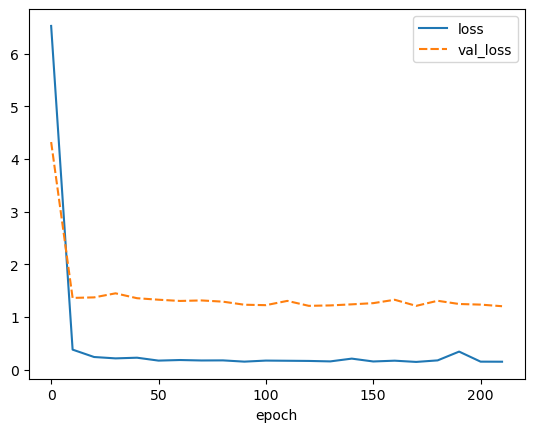

best weights loaded


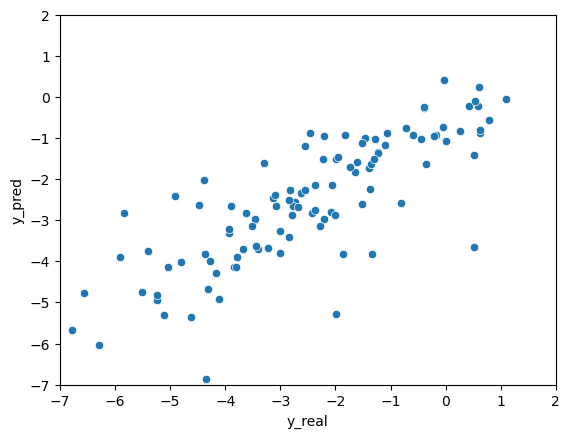

elapsed time: 15.473598957061768
run: 6
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8DA3A90>, <torch.utils.data.dataset.Subset object at 0x000002255F965310>, <torch.utils.data.dataset.Subset object at 0x000002255F97A850>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.315264670054118 | Validation Loss 2.1870081424713135
Epoch 10 | Train Loss 0.20273885627587637 | Validation Loss 0.5225861370563507
Epoch 20 | Train Loss 0.07150556817650795 | Validation Loss 0.5798582136631012
Epoch 30 | Train Loss 0.054860963796575866 | Validation Loss 0.5712883472442627
Epoch 40 | Train Loss 0.03477059031526248 | Validation Loss 0.59684157371521
Epoch 50 | Train Loss 0.021173889112348358 | Validation Loss 0.5846289843320847


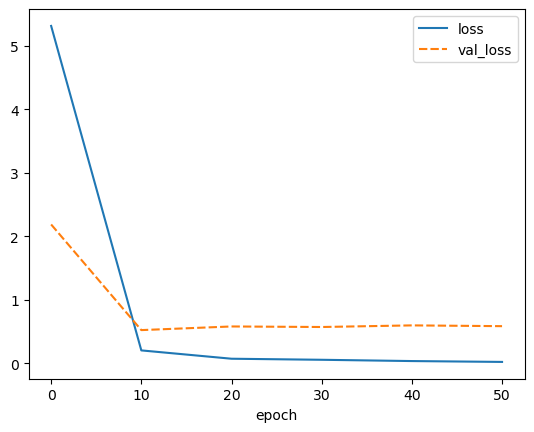

best weights loaded


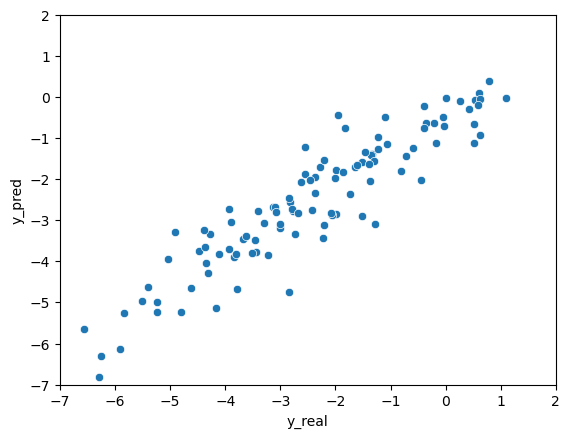

elapsed time: 4.664785861968994
run: 7
{'radius': 1, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8C409A0>, <torch.utils.data.dataset.Subset object at 0x0000022555F78EE0>, <torch.utils.data.dataset.Subset object at 0x0000022555F78C40>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 8.471727053324381 | Validation Loss 5.87553596496582
Epoch 10 | Train Loss 0.7123733152945836 | Validation Loss 1.6692922115325928
Epoch 20 | Train Loss 0.3526961068312327 | Validation Loss 1.6131753325462341
Epoch 30 | Train Loss 0.2687138905127843 | Validation Loss 1.5861791968345642
Epoch 40 | Train Loss 0.25095845696826774 | Validation Loss 1.3128644227981567
Epoch 50 | Train Loss 0.2318114052216212 | Validation Loss 1.4432365894317627
Epoch 60 | Train Loss 0.19960686104993025 | Validation Loss 1.4500463008880615
Epoch 70 | Train Loss 0.17837669824560484 | Validation Loss 1.373177021741867
Epoch 80 | Train Loss 0.23020267635583877 | Validation Loss 1.362310767173767
Epoch 90 | Train Loss 0.1609869894882043 | Validation Loss 1.3751381039619446


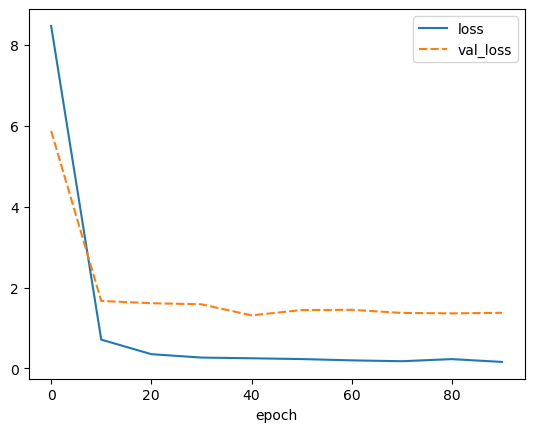

best weights loaded


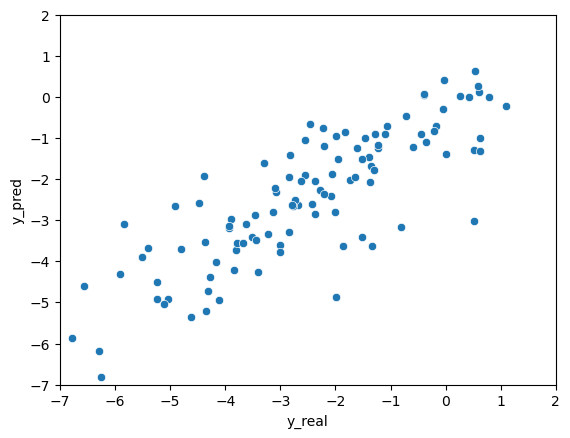

elapsed time: 5.869471073150635
run: 8
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8DE4340>, <torch.utils.data.dataset.Subset object at 0x0000022559CDEB50>, <torch.utils.data.dataset.Subset object at 0x0000022559CDEFA0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.690850194295248 | Validation Loss 1.3051959872245789
Epoch 10 | Train Loss 0.1397837152083715 | Validation Loss 0.5489350855350494
Epoch 20 | Train Loss 0.06291934599479039 | Validation Loss 0.5681158006191254
Epoch 30 | Train Loss 0.04886752640207608 | Validation Loss 0.5475734174251556
Epoch 40 | Train Loss 0.026255095843225718 | Validation Loss 0.5604655742645264
Epoch 50 | Train Loss 0.031012702857454617 | Validation Loss 0.5932210087776184


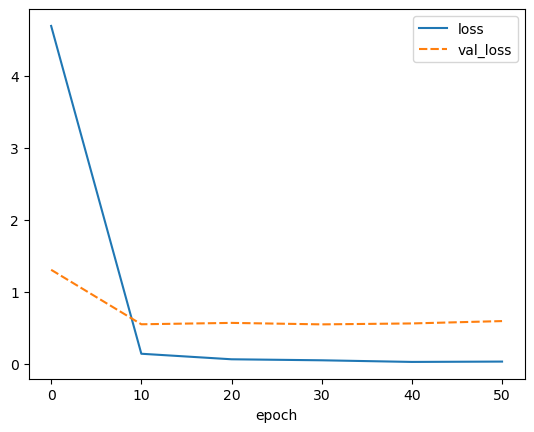

best weights loaded


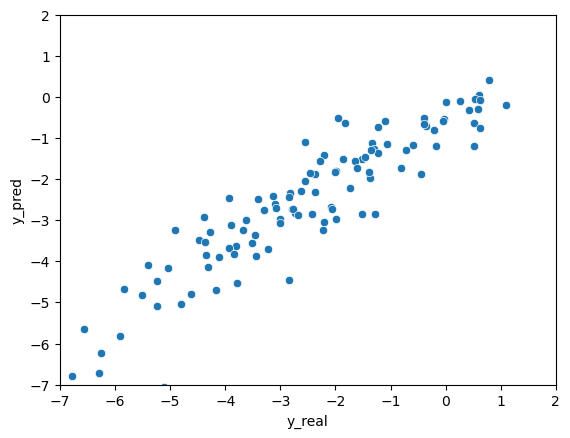

elapsed time: 5.624703884124756
run: 9
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9E71F10>, <torch.utils.data.dataset.Subset object at 0x00000224F8A8C640>, <torch.utils.data.dataset.Subset object at 0x00000225570ED070>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 7.724462985992432 | Validation Loss 5.433982253074646
Epoch 10 | Train Loss 0.5566671480735143 | Validation Loss 1.6376363635063171
Epoch 20 | Train Loss 0.3287339319785436 | Validation Loss 1.5044811367988586
Epoch 30 | Train Loss 0.2645211825768153 | Validation Loss 1.4355589151382446
Epoch 40 | Train Loss 0.21812255879243214 | Validation Loss 1.4943368434906006
Epoch 50 | Train Loss 0.2160805786649386 | Validation Loss 1.378215730190277
Epoch 60 | Train Loss 0.19970018664995828 | Validation Loss 1.3755661249160767
Epoch 70 | Train Loss 0.19772536878784497 | Validation Loss 1.413258969783783
Epoch 80 | Train Loss 0.2149839730312427 | Validation Loss 1.3539171814918518
Epoch 90 | Train Loss 0.16564476309965054 | Validation Loss 1.253119170665741
Epoch 100 | Train Loss 0.1701824928323428 | Validation Loss 1.2690606713294983
Epoch 110 | Train Loss 0.15602908295889695 | Validation Loss 1.2628251910209656
Epoch 120 | Train Loss 0.15651436497767765 | Validation Loss 1.

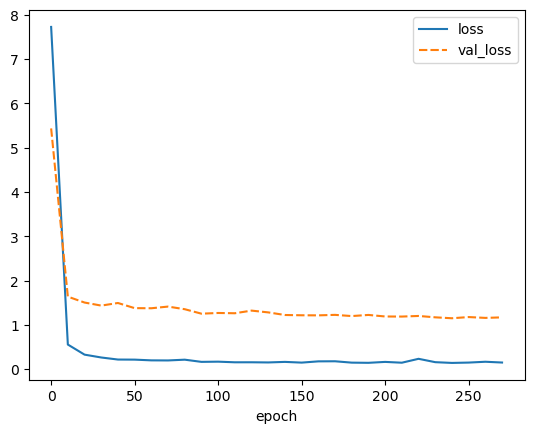

best weights loaded


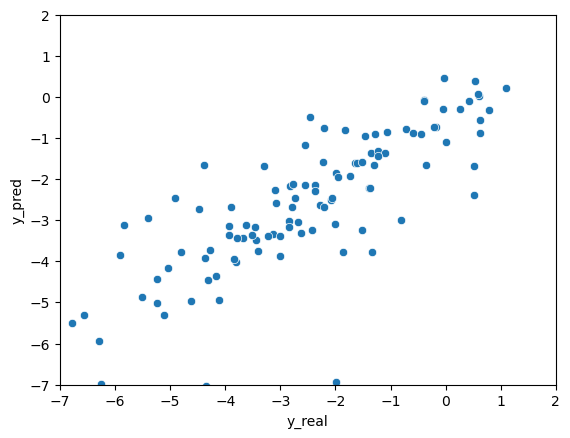

elapsed time: 19.75256848335266
run: 10
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8C155B0>, <torch.utils.data.dataset.Subset object at 0x0000022559C319D0>, <torch.utils.data.dataset.Subset object at 0x0000022559C31AF0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.379792491594951 | Validation Loss 3.9461865425109863
Epoch 10 | Train Loss 0.1255723387002945 | Validation Loss 0.49182794988155365
Epoch 20 | Train Loss 0.11173664095501105 | Validation Loss 0.47944211959838867
Epoch 30 | Train Loss 0.049156777933239935 | Validation Loss 0.5480686575174332
Epoch 40 | Train Loss 0.06358935746053855 | Validation Loss 0.5604608058929443
Epoch 50 | Train Loss 0.023768670732776324 | Validation Loss 0.5356891304254532
Epoch 60 | Train Loss 0.04986516920228799 | Validation Loss 0.5372162461280823
Epoch 70 | Train Loss 0.07603680988152822 | Validation Loss 0.5656924992799759


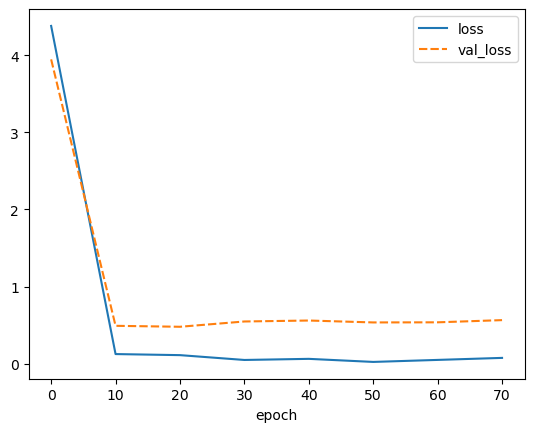

best weights loaded


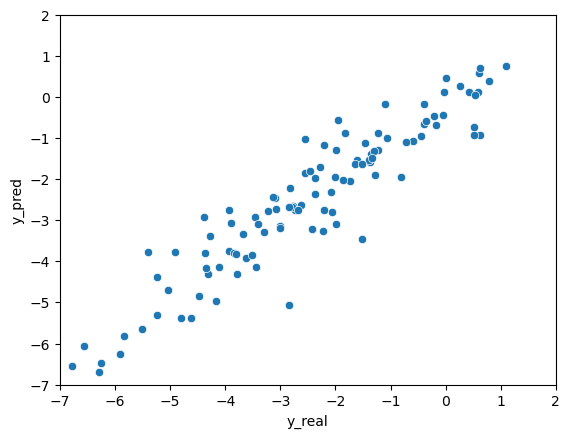

elapsed time: 8.363253831863403
run: 11
{'radius': 1, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9F940A0>, <torch.utils.data.dataset.Subset object at 0x00000224F8D5B790>, <torch.utils.data.dataset.Subset object at 0x00000224F8D5B430>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.738828659057617 | Validation Loss 2.9876073598861694
Epoch 10 | Train Loss 0.3761697269976139 | Validation Loss 1.4385927319526672
Epoch 20 | Train Loss 0.28526146014531456 | Validation Loss 1.3322515487670898
Epoch 30 | Train Loss 0.34176168541113533 | Validation Loss 1.550131380558014
Epoch 40 | Train Loss 0.20468691388765972 | Validation Loss 1.2025967836380005
Epoch 50 | Train Loss 0.19567150995135307 | Validation Loss 1.2450069785118103
Epoch 60 | Train Loss 0.2116333194077015 | Validation Loss 1.2802121043205261
Epoch 70 | Train Loss 0.165479381258289 | Validation Loss 1.1345968544483185
Epoch 80 | Train Loss 0.17582228829463323 | Validation Loss 1.2138721942901611
Epoch 90 | Train Loss 0.17873088121414185 | Validation Loss 1.0896985530853271
Epoch 100 | Train Loss 0.15353169937928518 | Validation Loss 1.0998749136924744
Epoch 110 | Train Loss 0.18626786917448043 | Validation Loss 1.1614305675029755
Epoch 120 | Train Loss 0.17311162799596785 | Validation Lo

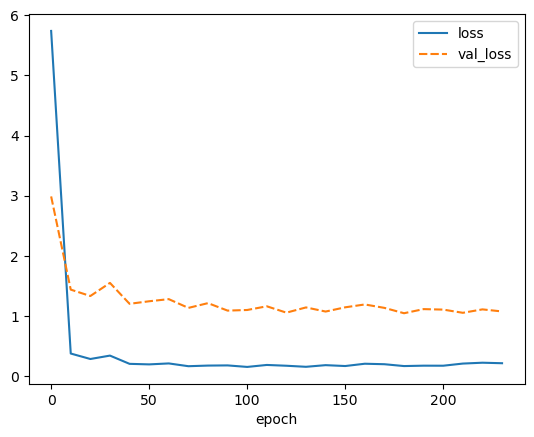

best weights loaded


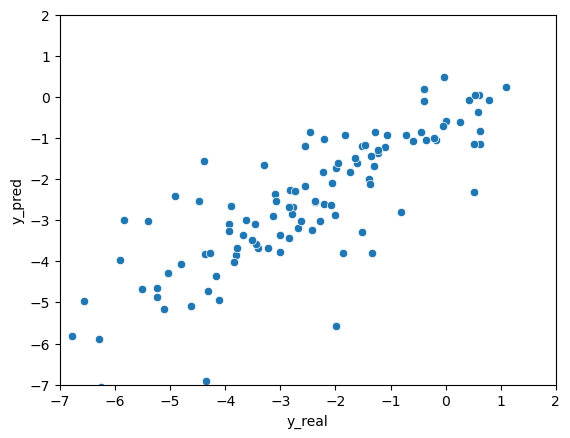

elapsed time: 24.248043537139893
run: 12
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8A1E1F0>, <torch.utils.data.dataset.Subset object at 0x000002255FA21AC0>, <torch.utils.data.dataset.Subset object at 0x000002255FA21EE0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.9221843441327415 | Validation Loss 2.234306514263153
Epoch 10 | Train Loss 0.15641452309985956 | Validation Loss 0.5023652017116547
Epoch 20 | Train Loss 0.2252044769624869 | Validation Loss 0.6263458728790283
Epoch 30 | Train Loss 0.04518698112418254 | Validation Loss 0.5353957265615463
Epoch 40 | Train Loss 0.06823376485457024 | Validation Loss 0.6709394156932831
Epoch 50 | Train Loss 0.053939131026466684 | Validation Loss 0.5889137983322144
Epoch 60 | Train Loss 0.03326931024591128 | Validation Loss 0.5952714681625366


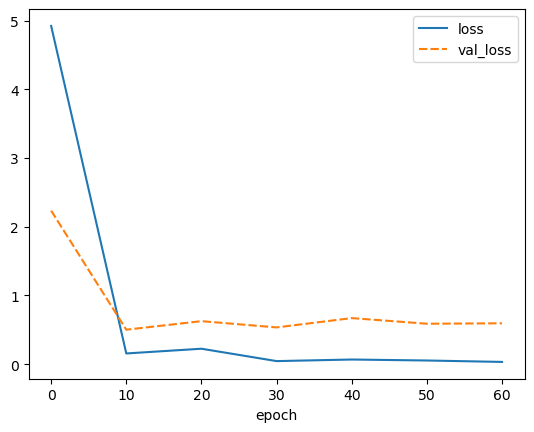

best weights loaded


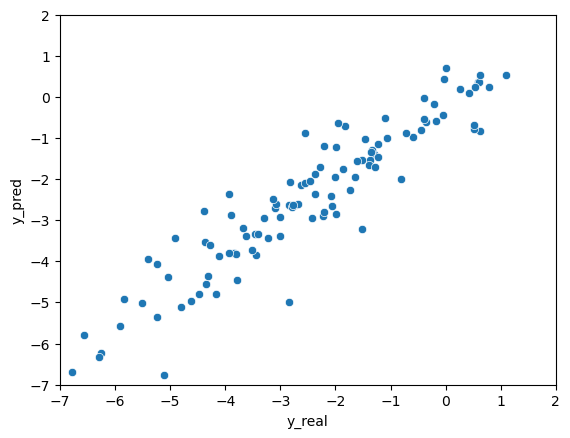

elapsed time: 5.4149816036224365
run: 13
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9E68850>, <torch.utils.data.dataset.Subset object at 0x00000224F8A9BDF0>, <torch.utils.data.dataset.Subset object at 0x00000224F8A9B3D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.2740428924560545 | Validation Loss 3.9953768253326416
Epoch 10 | Train Loss 0.4292977094650269 | Validation Loss 1.3722116351127625
Epoch 20 | Train Loss 0.2581048553188642 | Validation Loss 1.440019965171814
Epoch 30 | Train Loss 0.2328434350589911 | Validation Loss 1.4873843491077423
Epoch 40 | Train Loss 0.466881138086319 | Validation Loss 1.5734053254127502
Epoch 50 | Train Loss 0.2141196553905805 | Validation Loss 1.3370246291160583
Epoch 60 | Train Loss 0.2607025636980931 | Validation Loss 1.2356304824352264
Epoch 70 | Train Loss 0.1783307060599327 | Validation Loss 1.2344664931297302
Epoch 80 | Train Loss 0.1934200338398417 | Validation Loss 1.2332347631454468
Epoch 90 | Train Loss 0.16289043414096038 | Validation Loss 1.2908809781074524
Epoch 100 | Train Loss 0.18417757687469324 | Validation Loss 1.2794622778892517
Epoch 110 | Train Loss 0.15370185803622008 | Validation Loss 1.2566683292388916
Epoch 120 | Train Loss 0.16492512952536345 | Validation Loss 1

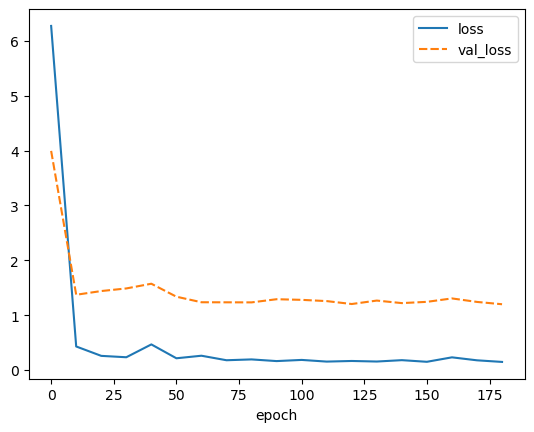

best weights loaded


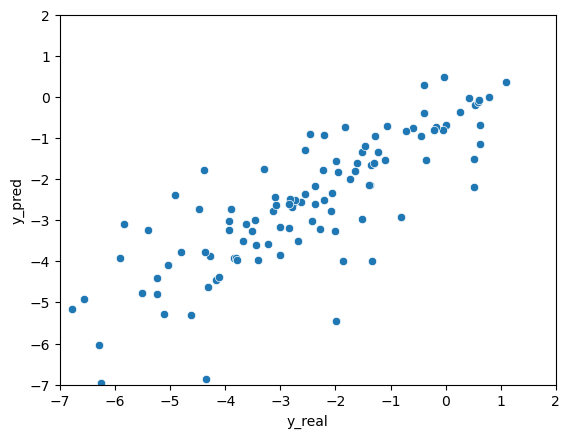

elapsed time: 13.257061004638672
run: 14
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8A73C10>, <torch.utils.data.dataset.Subset object at 0x000002255F9861C0>, <torch.utils.data.dataset.Subset object at 0x000002255F963970>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.02557729880015 | Validation Loss 2.3394157886505127
Epoch 10 | Train Loss 0.19528205394744874 | Validation Loss 0.5311134159564972
Epoch 20 | Train Loss 0.08747353230913481 | Validation Loss 0.5757439136505127
Epoch 30 | Train Loss 0.045455969497561456 | Validation Loss 0.620677649974823
Epoch 40 | Train Loss 0.04759048509101073 | Validation Loss 0.6367985308170319
Epoch 50 | Train Loss 0.03284207818408807 | Validation Loss 0.587579071521759
Epoch 60 | Train Loss 0.027538871951401235 | Validation Loss 0.5688177049160004


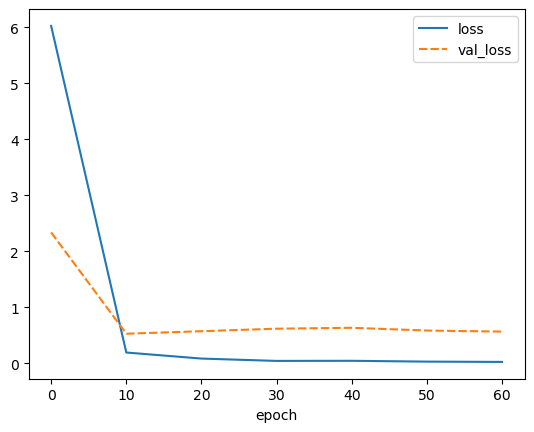

best weights loaded


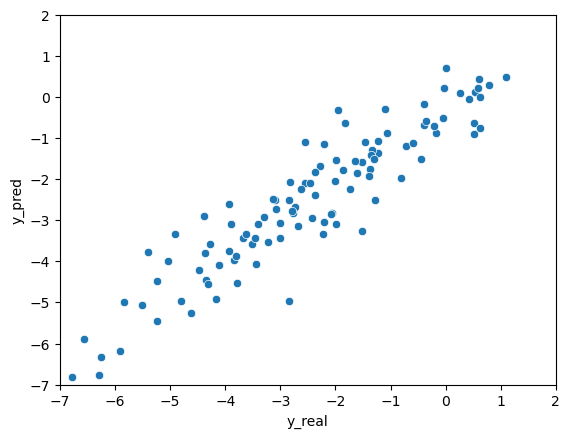

elapsed time: 4.819786071777344
run: 15
{'radius': 1, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000225571C0190>, <torch.utils.data.dataset.Subset object at 0x00000224F8D84EE0>, <torch.utils.data.dataset.Subset object at 0x00000225570C81F0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 8.650676409403482 | Validation Loss 5.557671666145325
Epoch 10 | Train Loss 0.6845155855019888 | Validation Loss 1.733546793460846
Epoch 20 | Train Loss 0.42874814371267955 | Validation Loss 1.5679420232772827
Epoch 30 | Train Loss 0.2829040974378586 | Validation Loss 1.6238351464271545
Epoch 40 | Train Loss 0.24114428559939066 | Validation Loss 1.5680676698684692
Epoch 50 | Train Loss 0.20625712350010872 | Validation Loss 1.596478283405304
Epoch 60 | Train Loss 0.20548448065916697 | Validation Loss 1.5487895011901855
Epoch 70 | Train Loss 0.2051200638214747 | Validation Loss 1.4966891407966614
Epoch 80 | Train Loss 0.17647739816457034 | Validation Loss 1.4612827897071838
Epoch 90 | Train Loss 0.2129332756002744 | Validation Loss 1.4217631816864014
Epoch 100 | Train Loss 0.1551749010415127 | Validation Loss 1.3960338830947876
Epoch 110 | Train Loss 0.2178726409872373 | Validation Loss 1.5016493797302246
Epoch 120 | Train Loss 0.17172414933641753 | Validation Loss 1

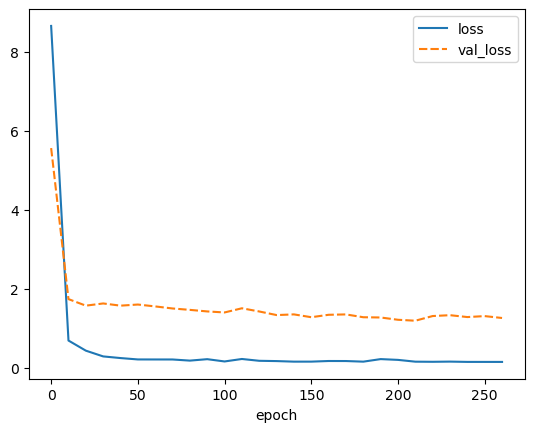

best weights loaded


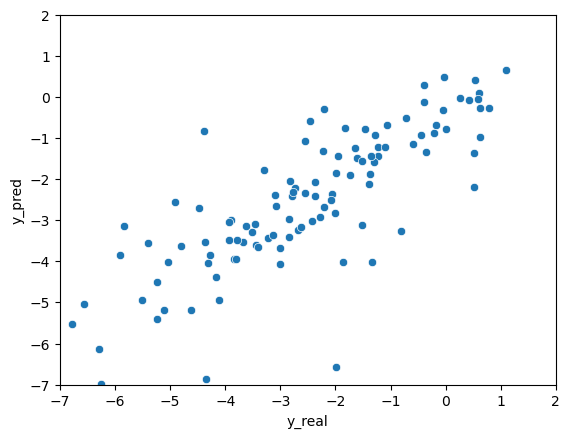

elapsed time: 15.219672679901123
run: 16
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8A692B0>, <torch.utils.data.dataset.Subset object at 0x00000224F9EB8430>, <torch.utils.data.dataset.Subset object at 0x00000224F9EB8490>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.355505035320918 | Validation Loss 1.281054973602295
Epoch 10 | Train Loss 0.09881474326054256 | Validation Loss 0.5381720662117004
Epoch 20 | Train Loss 0.026771672256290912 | Validation Loss 0.5358020514249802
Epoch 30 | Train Loss 0.019929873757064342 | Validation Loss 0.5565618127584457
Epoch 40 | Train Loss 0.025279592567433912 | Validation Loss 0.5516170561313629
Epoch 50 | Train Loss 0.018332341344406207 | Validation Loss 0.5425644814968109


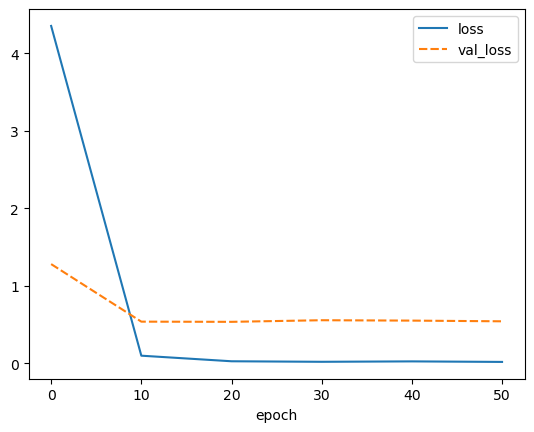

best weights loaded


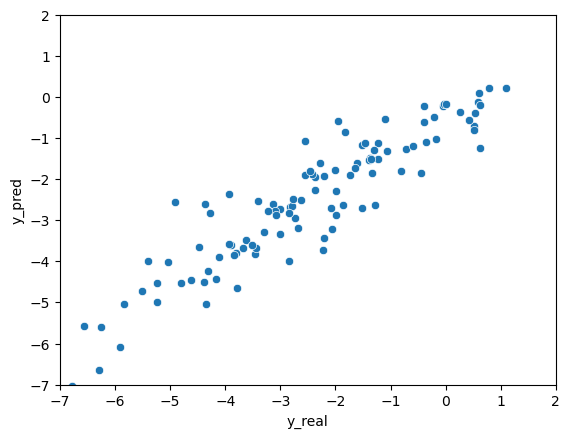

elapsed time: 4.363600015640259
run: 17
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9E2C0D0>, <torch.utils.data.dataset.Subset object at 0x000002255FA5E850>, <torch.utils.data.dataset.Subset object at 0x000002255FA5EE80>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.698831351598104 | Validation Loss 4.639467239379883
Epoch 10 | Train Loss 0.25343468636274336 | Validation Loss 1.5810041427612305
Epoch 20 | Train Loss 0.09341950385520856 | Validation Loss 1.4782231450080872
Epoch 30 | Train Loss 0.08520884501437347 | Validation Loss 1.4541026949882507
Epoch 40 | Train Loss 0.07488695668677489 | Validation Loss 1.361413061618805
Epoch 50 | Train Loss 0.08776135394970576 | Validation Loss 1.3857113122940063
Epoch 60 | Train Loss 0.07366623176882664 | Validation Loss 1.367995023727417
Epoch 70 | Train Loss 0.07310157145063083 | Validation Loss 1.3697590231895447
Epoch 80 | Train Loss 0.07851111447283378 | Validation Loss 1.3527432084083557
Epoch 90 | Train Loss 0.06007237896944086 | Validation Loss 1.329885482788086
Epoch 100 | Train Loss 0.08594022728502751 | Validation Loss 1.3401433229446411
Epoch 110 | Train Loss 0.0844041479130586 | Validation Loss 1.3175662159919739
Epoch 120 | Train Loss 0.11669208978613217 | Validation Lo

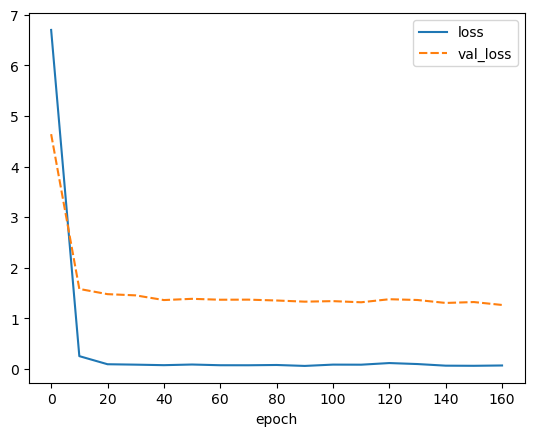

best weights loaded


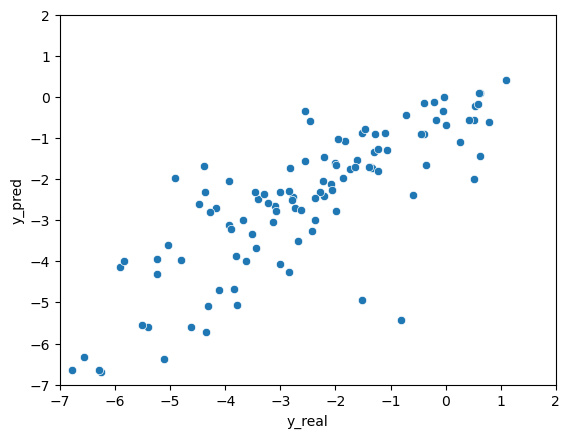

elapsed time: 10.739335298538208
run: 18
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8E03520>, <torch.utils.data.dataset.Subset object at 0x00000224F8C66CA0>, <torch.utils.data.dataset.Subset object at 0x00000224F8C663D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.4324186285336813 | Validation Loss 1.216156542301178
Epoch 10 | Train Loss 0.12111786405245463 | Validation Loss 0.6804236173629761
Epoch 20 | Train Loss 0.0868981746956706 | Validation Loss 0.6021067798137665
Epoch 30 | Train Loss 0.07717447727918625 | Validation Loss 0.5847900956869125
Epoch 40 | Train Loss 0.05216862866654992 | Validation Loss 0.5443844646215439
Epoch 50 | Train Loss 0.014894728393604359 | Validation Loss 0.5086910575628281


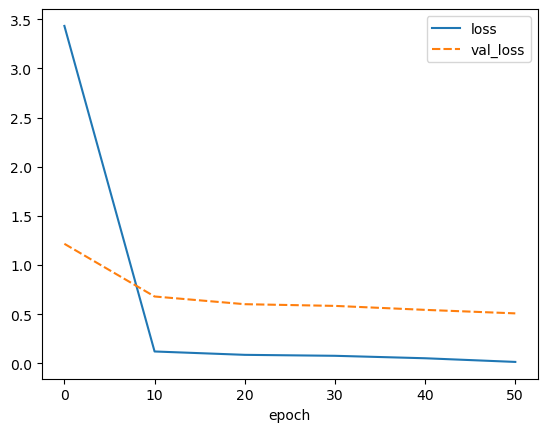

best weights loaded


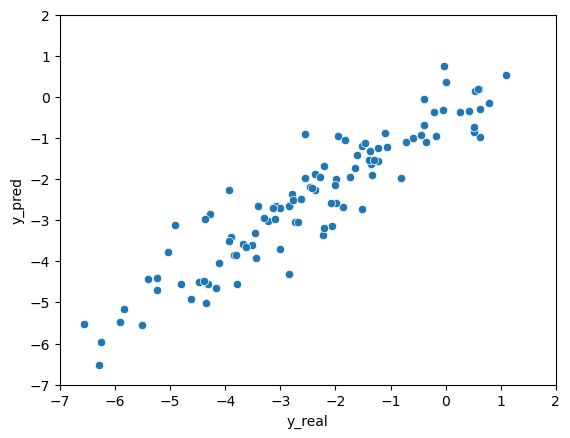

elapsed time: 5.2764081954956055
run: 19
{'radius': 2, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8DC1EE0>, <torch.utils.data.dataset.Subset object at 0x00000225573649A0>, <torch.utils.data.dataset.Subset object at 0x000002255FA08730>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.7269703110059105 | Validation Loss 3.950237512588501
Epoch 10 | Train Loss 0.14603760441144306 | Validation Loss 1.4652795195579529
Epoch 20 | Train Loss 0.1549537609020869 | Validation Loss 1.719913363456726
Epoch 30 | Train Loss 0.24587972809871037 | Validation Loss 1.5095131993293762
Epoch 40 | Train Loss 0.13413479601343473 | Validation Loss 1.3352839946746826
Epoch 50 | Train Loss 0.13764068074524402 | Validation Loss 1.3522676229476929
Epoch 60 | Train Loss 0.08518951510389645 | Validation Loss 1.3502104878425598
Epoch 70 | Train Loss 0.2215705600877603 | Validation Loss 1.5616969466209412
Epoch 80 | Train Loss 0.07118571226795514 | Validation Loss 1.4299451112747192
Epoch 90 | Train Loss 0.0674887804624935 | Validation Loss 1.4344567656517029
Epoch 100 | Train Loss 0.152327363876005 | Validation Loss 1.3727535009384155


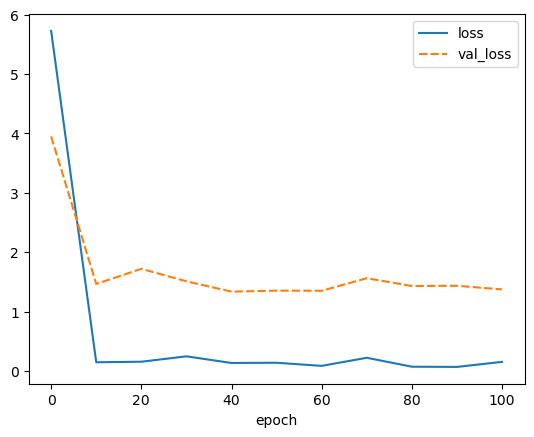

best weights loaded


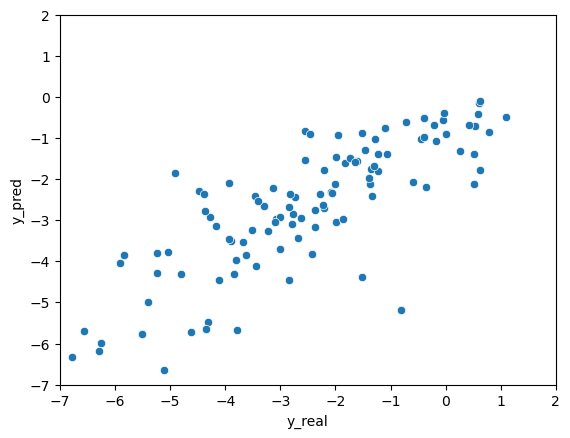

elapsed time: 9.056148290634155
run: 20
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9E494C0>, <torch.utils.data.dataset.Subset object at 0x00000225570F4B20>, <torch.utils.data.dataset.Subset object at 0x00000224F8BDC730>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.4627681016922 | Validation Loss 2.6536329984664917
Epoch 10 | Train Loss 0.11503265798091888 | Validation Loss 0.5763621777296066
Epoch 20 | Train Loss 0.03574323443075021 | Validation Loss 0.5575549602508545
Epoch 30 | Train Loss 0.02488901453713576 | Validation Loss 0.5206305533647537
Epoch 40 | Train Loss 0.041101641083757086 | Validation Loss 0.6010783314704895
Epoch 50 | Train Loss 0.01983750343012313 | Validation Loss 0.5512087643146515
Epoch 60 | Train Loss 0.1003244772553444 | Validation Loss 0.6088323295116425
Epoch 70 | Train Loss 0.014615651189039151 | Validation Loss 0.5193175375461578
Epoch 80 | Train Loss 0.012923553710182507 | Validation Loss 0.56468266248703
Epoch 90 | Train Loss 0.006584903054560224 | Validation Loss 0.5071501135826111
Epoch 100 | Train Loss 0.005829948093742132 | Validation Loss 0.5311500877141953
Epoch 110 | Train Loss 0.12012711515029272 | Validation Loss 0.5594491511583328
Epoch 120 | Train Loss 0.009312803825984399 | Validat

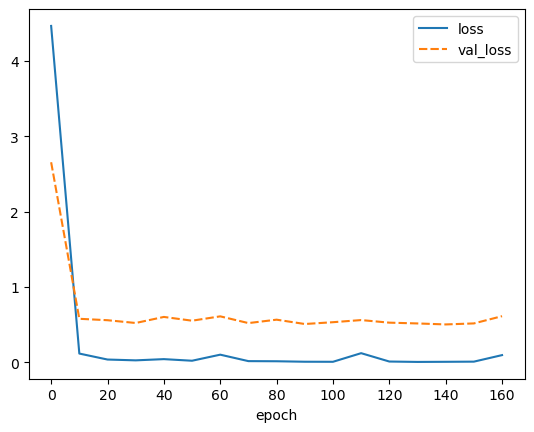

best weights loaded


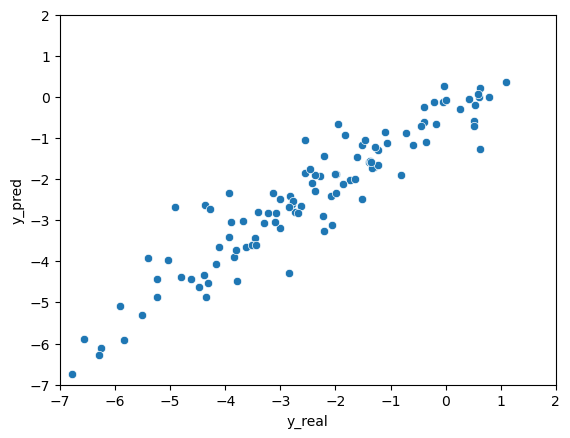

elapsed time: 10.49998164176941
run: 21
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F84654F0>, <torch.utils.data.dataset.Subset object at 0x0000022559C4B0A0>, <torch.utils.data.dataset.Subset object at 0x0000022559C4BB80>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.814992721875509 | Validation Loss 3.7405871152877808
Epoch 10 | Train Loss 0.1564989392956098 | Validation Loss 1.2845220267772675
Epoch 20 | Train Loss 0.1908567652106285 | Validation Loss 1.4526450634002686
Epoch 30 | Train Loss 0.135028113424778 | Validation Loss 1.3673006296157837
Epoch 40 | Train Loss 0.11294064149260521 | Validation Loss 1.553509533405304
Epoch 50 | Train Loss 0.10221958768864473 | Validation Loss 1.3164491653442383
Epoch 60 | Train Loss 0.06768248127773405 | Validation Loss 1.40151646733284
Epoch 70 | Train Loss 0.06286819993207853 | Validation Loss 1.331337571144104


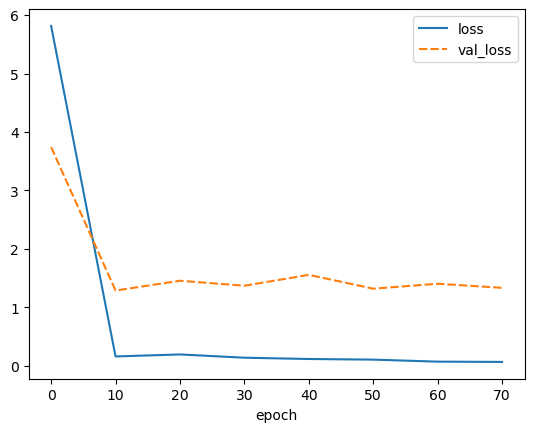

best weights loaded


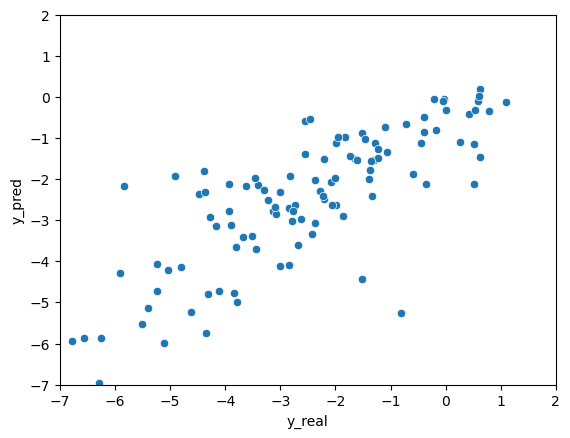

elapsed time: 5.330963611602783
run: 22
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000225571DA7F0>, <torch.utils.data.dataset.Subset object at 0x00000224F8BE2220>, <torch.utils.data.dataset.Subset object at 0x00000224F8BE2F40>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.0169973532358805 | Validation Loss 1.8674325942993164
Epoch 10 | Train Loss 0.11232900942365329 | Validation Loss 0.5823316872119904
Epoch 20 | Train Loss 0.033744858826200166 | Validation Loss 0.6111496686935425
Epoch 30 | Train Loss 0.02040839207669099 | Validation Loss 0.5831526517868042
Epoch 40 | Train Loss 0.015401271575440963 | Validation Loss 0.6090349853038788
Epoch 50 | Train Loss 0.016064161155372857 | Validation Loss 0.6014688462018967
Epoch 60 | Train Loss 0.012656051820764938 | Validation Loss 0.5608834624290466


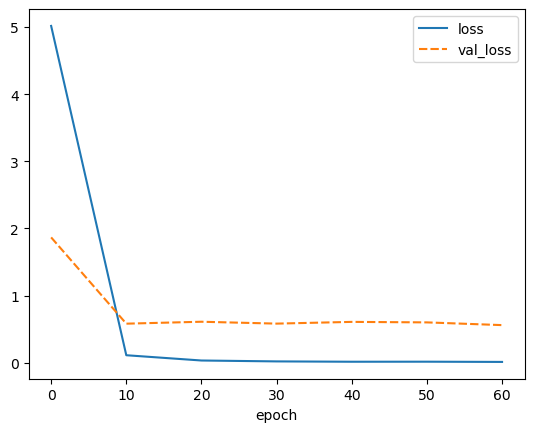

best weights loaded


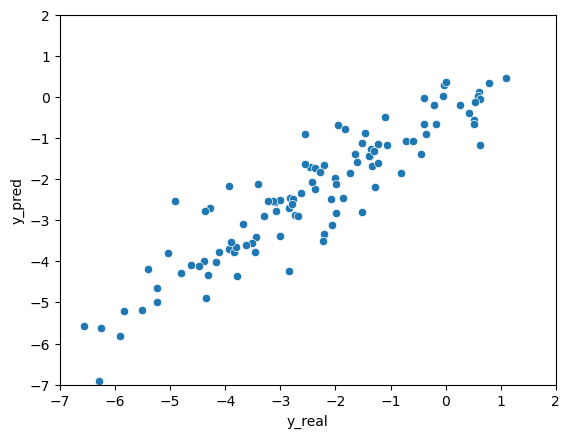

elapsed time: 5.0119712352752686
run: 23
{'radius': 2, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9E49340>, <torch.utils.data.dataset.Subset object at 0x00000224F8D589D0>, <torch.utils.data.dataset.Subset object at 0x00000224F8D58DC0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 7.38713477452596 | Validation Loss 5.047344446182251
Epoch 10 | Train Loss 0.3833064471681913 | Validation Loss 1.7654856443405151
Epoch 20 | Train Loss 0.11169298676153024 | Validation Loss 1.4889155626296997
Epoch 30 | Train Loss 0.10559578550358613 | Validation Loss 1.5597021579742432
Epoch 40 | Train Loss 0.06872865036129952 | Validation Loss 1.5000061392784119
Epoch 50 | Train Loss 0.06688760537654162 | Validation Loss 1.5246246457099915
Epoch 60 | Train Loss 0.07164184742917618 | Validation Loss 1.5583083033561707
Epoch 70 | Train Loss 0.0777008542791009 | Validation Loss 1.4883685111999512
Epoch 80 | Train Loss 0.0998269896954298 | Validation Loss 1.5397008955478668
Epoch 90 | Train Loss 0.06370251526435217 | Validation Loss 1.3923766016960144
Epoch 100 | Train Loss 0.06415447170535724 | Validation Loss 1.3844218850135803
Epoch 110 | Train Loss 0.07689730636775494 | Validation Loss 1.357196867465973
Epoch 120 | Train Loss 0.06906693767135343 | Validation Los

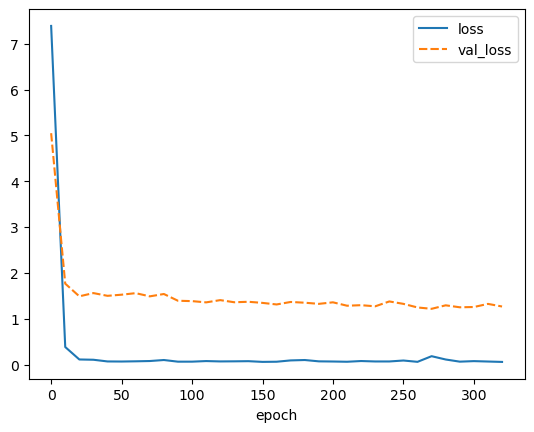

best weights loaded


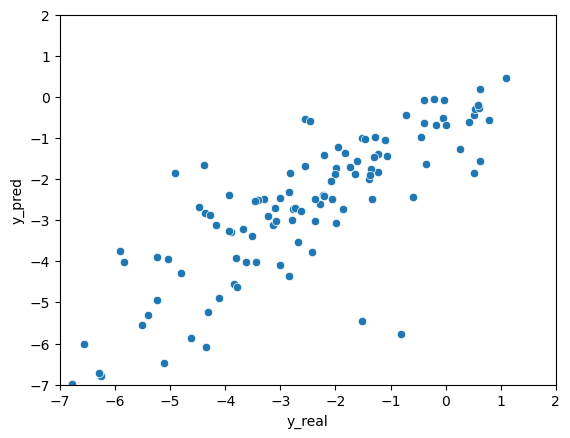

elapsed time: 17.238409280776978
run: 24
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002255734EAC0>, <torch.utils.data.dataset.Subset object at 0x00000224F8D386D0>, <torch.utils.data.dataset.Subset object at 0x00000224F8BE24F0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.501864488919576 | Validation Loss 0.9598185420036316
Epoch 10 | Train Loss 0.10805817594130834 | Validation Loss 0.5304256975650787
Epoch 20 | Train Loss 0.05387049056589603 | Validation Loss 0.5539917051792145
Epoch 30 | Train Loss 0.015419938399766882 | Validation Loss 0.5836792290210724
Epoch 40 | Train Loss 0.013953215690950553 | Validation Loss 0.5891307443380356
Epoch 50 | Train Loss 0.01512766747425 | Validation Loss 0.5635994672775269


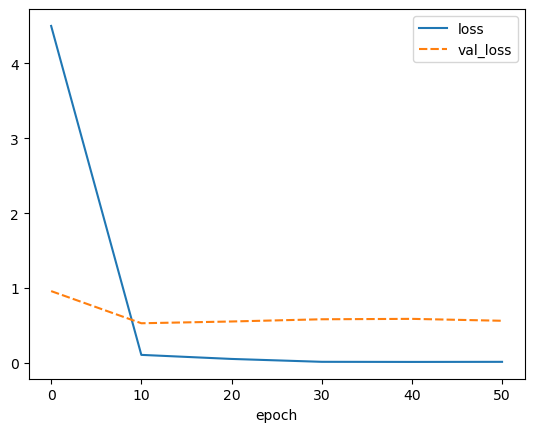

best weights loaded


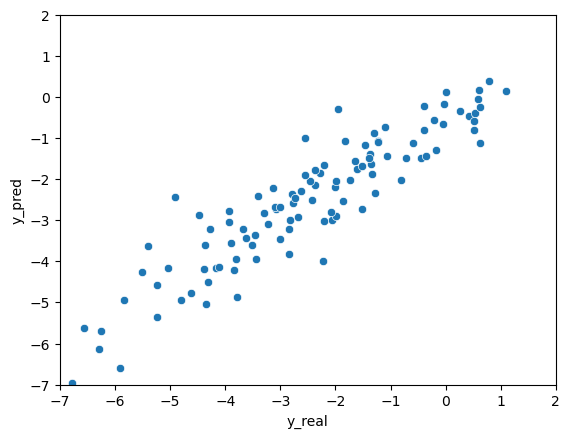

elapsed time: 5.026054620742798
run: 25
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9F579A0>, <torch.utils.data.dataset.Subset object at 0x0000022557400EE0>, <torch.utils.data.dataset.Subset object at 0x0000022557400E20>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 7.049165598551432 | Validation Loss 4.459221363067627
Epoch 10 | Train Loss 0.2251480147242546 | Validation Loss 1.4074576497077942
Epoch 20 | Train Loss 0.14191174606482188 | Validation Loss 1.2735608220100403
Epoch 30 | Train Loss 0.07972786505706608 | Validation Loss 1.2654296159744263
Epoch 40 | Train Loss 0.07444944605231285 | Validation Loss 1.2330377697944641
Epoch 50 | Train Loss 0.07919780425727367 | Validation Loss 1.2521971464157104
Epoch 60 | Train Loss 0.07479587395985922 | Validation Loss 1.2442080974578857
Epoch 70 | Train Loss 0.07593353980531295 | Validation Loss 1.1844002604484558
Epoch 80 | Train Loss 0.08123746283041934 | Validation Loss 1.2325599193572998
Epoch 90 | Train Loss 0.08575950593998034 | Validation Loss 1.2326943278312683
Epoch 100 | Train Loss 0.1385798531274001 | Validation Loss 1.2098718285560608
Epoch 110 | Train Loss 0.08674897328019142 | Validation Loss 1.1326830089092255
Epoch 120 | Train Loss 0.06871176920831204 | Validation 

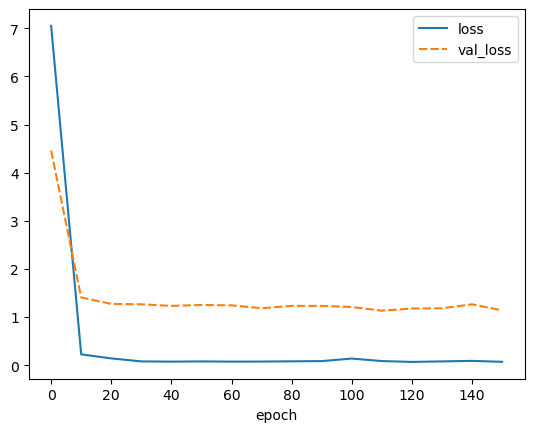

best weights loaded


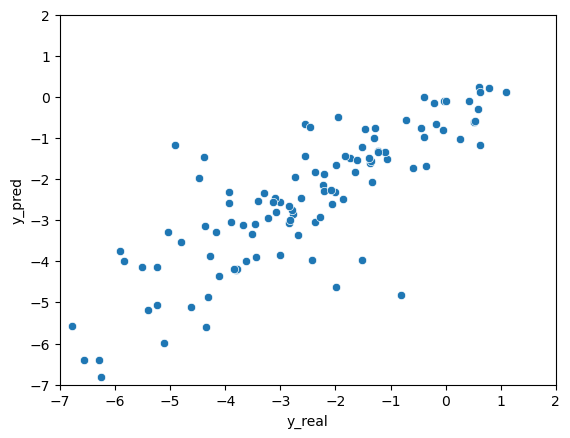

elapsed time: 10.617286920547485
run: 26
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F89F3A90>, <torch.utils.data.dataset.Subset object at 0x00000224F8C79FD0>, <torch.utils.data.dataset.Subset object at 0x00000224F8C79370>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.888257638613383 | Validation Loss 1.619816780090332
Epoch 10 | Train Loss 0.1411211927731832 | Validation Loss 0.550030380487442
Epoch 20 | Train Loss 0.04306115694344044 | Validation Loss 0.5206585824489594
Epoch 30 | Train Loss 0.057196015926698845 | Validation Loss 0.554888129234314
Epoch 40 | Train Loss 0.058635732034842174 | Validation Loss 0.5708194971084595
Epoch 50 | Train Loss 0.025716580916196108 | Validation Loss 0.5844211578369141
Epoch 60 | Train Loss 0.01266259631762902 | Validation Loss 0.5264172255992889
Epoch 70 | Train Loss 0.10300614523390929 | Validation Loss 0.553608626127243
Epoch 80 | Train Loss 0.029295441508293153 | Validation Loss 0.5416836440563202


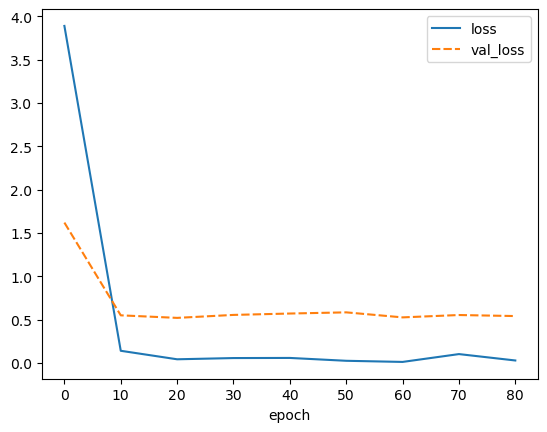

best weights loaded


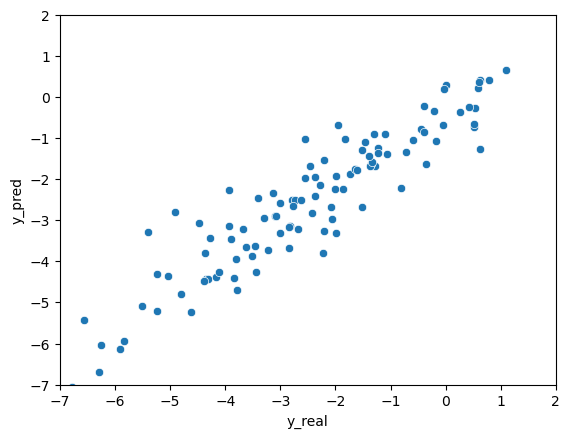

elapsed time: 9.253152847290039
run: 27
{'radius': 2, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8AF6B80>, <torch.utils.data.dataset.Subset object at 0x000002255F92C8E0>, <torch.utils.data.dataset.Subset object at 0x000002255F92C070>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.578549265861511 | Validation Loss 2.6947959661483765
Epoch 10 | Train Loss 0.20107391973336539 | Validation Loss 1.2888749241828918
Epoch 20 | Train Loss 0.15373593419790268 | Validation Loss 1.2074962854385376
Epoch 30 | Train Loss 0.13794561773538588 | Validation Loss 1.2039666771888733
Epoch 40 | Train Loss 0.07598154718677202 | Validation Loss 1.3529621958732605
Epoch 50 | Train Loss 0.19421834101279575 | Validation Loss 1.3948707580566406
Epoch 60 | Train Loss 0.0945926584303379 | Validation Loss 1.2522633075714111
Epoch 70 | Train Loss 0.12183295041322709 | Validation Loss 1.2609657049179077
Epoch 80 | Train Loss 0.07755901478230953 | Validation Loss 1.2653645277023315
Epoch 90 | Train Loss 0.08934620283544063 | Validation Loss 1.2104811072349548
Epoch 100 | Train Loss 0.12340259154637655 | Validation Loss 1.1866077184677124
Epoch 110 | Train Loss 0.06588916100251178 | Validation Loss 1.1579797267913818


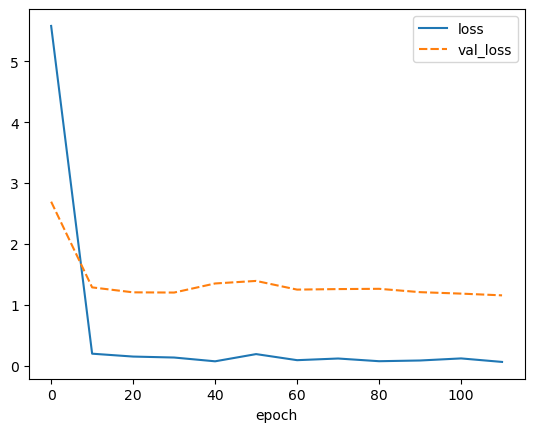

best weights loaded


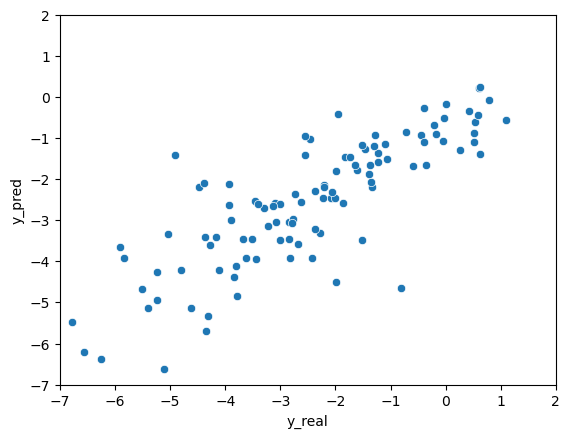

elapsed time: 10.974955558776855
run: 28
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022557303A90>, <torch.utils.data.dataset.Subset object at 0x00000224F8B053A0>, <torch.utils.data.dataset.Subset object at 0x00000224F8B05F70>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.662174733479818 | Validation Loss 1.9621870517730713
Epoch 10 | Train Loss 0.09290464172760646 | Validation Loss 0.5931725203990936
Epoch 20 | Train Loss 0.07041615967949232 | Validation Loss 0.5514208972454071
Epoch 30 | Train Loss 0.055701928896208605 | Validation Loss 0.5646412968635559
Epoch 40 | Train Loss 0.03763185351466139 | Validation Loss 0.5762567818164825
Epoch 50 | Train Loss 0.014718804353227219 | Validation Loss 0.5343203842639923
Epoch 60 | Train Loss 0.012558327273776133 | Validation Loss 0.5265623927116394
Epoch 70 | Train Loss 0.03832103296493491 | Validation Loss 0.5476207435131073
Epoch 80 | Train Loss 0.09409640518327554 | Validation Loss 0.6919237077236176
Epoch 90 | Train Loss 0.010755138471722603 | Validation Loss 0.510450690984726
Epoch 100 | Train Loss 0.027469607070088387 | Validation Loss 0.5163645446300507
Epoch 110 | Train Loss 0.012708173987145225 | Validation Loss 0.5033299624919891
Epoch 120 | Train Loss 0.0072538773839672405 | V

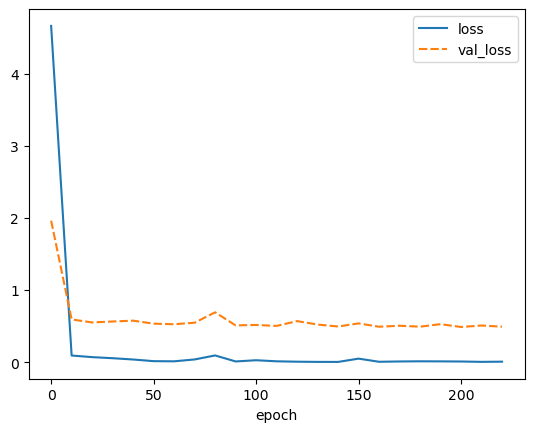

best weights loaded


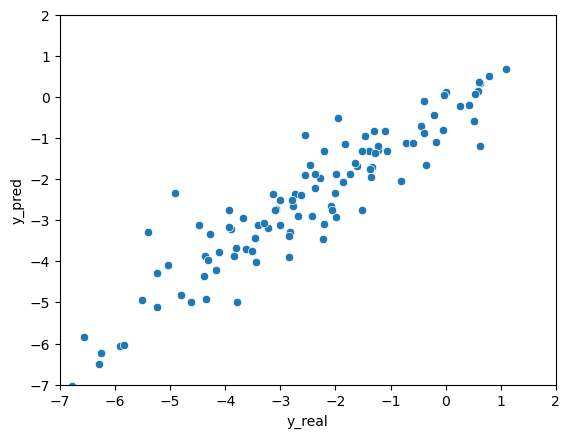

elapsed time: 13.732640981674194
run: 29
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8A8CF70>, <torch.utils.data.dataset.Subset object at 0x0000022565299A60>, <torch.utils.data.dataset.Subset object at 0x0000022565299E80>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.9683248917261755 | Validation Loss 3.346564292907715
Epoch 10 | Train Loss 0.15153251886367797 | Validation Loss 1.1897816061973572
Epoch 20 | Train Loss 0.10951666596035163 | Validation Loss 1.2769904732704163
Epoch 30 | Train Loss 0.10925600243111451 | Validation Loss 1.2608795166015625
Epoch 40 | Train Loss 0.07329772015412649 | Validation Loss 1.1893743872642517
Epoch 50 | Train Loss 0.08770919851958751 | Validation Loss 1.2495805025100708
Epoch 60 | Train Loss 0.07552764148761829 | Validation Loss 1.2002956867218018
Epoch 70 | Train Loss 0.1334657340000073 | Validation Loss 1.3150306940078735
Epoch 80 | Train Loss 0.07401149676491817 | Validation Loss 1.1592651009559631
Epoch 90 | Train Loss 0.12293385763963063 | Validation Loss 1.2568106651306152
Epoch 100 | Train Loss 0.11336353644728661 | Validation Loss 1.1627550721168518
Epoch 110 | Train Loss 0.10587637474139532 | Validation Loss 1.2874846458435059
Epoch 120 | Train Loss 0.06232634503394365 | Validatio

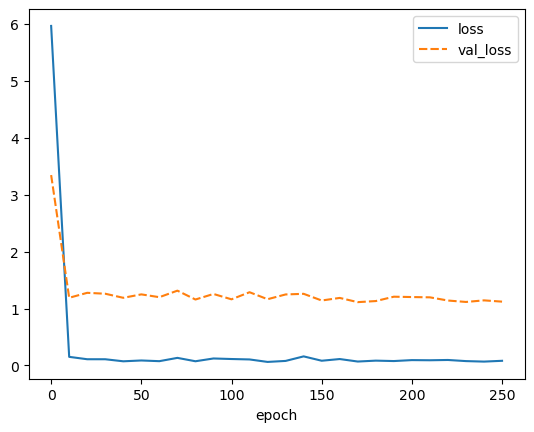

best weights loaded


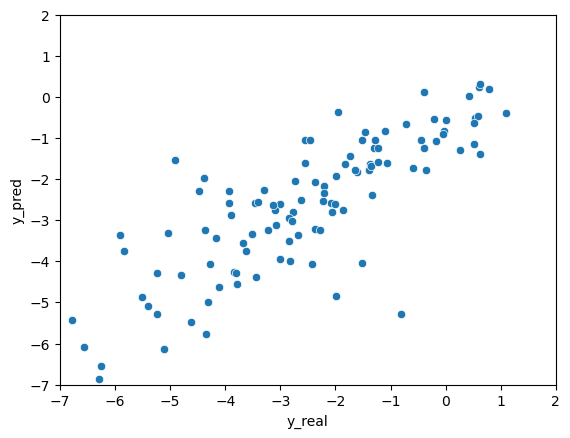

elapsed time: 18.33858370780945
run: 30
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8CF4D30>, <torch.utils.data.dataset.Subset object at 0x00000225653A75B0>, <torch.utils.data.dataset.Subset object at 0x00000225653A7D00>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.197602717081706 | Validation Loss 2.163197875022888
Epoch 10 | Train Loss 0.08998179361224175 | Validation Loss 0.5648786425590515
Epoch 20 | Train Loss 0.053343857048700254 | Validation Loss 0.5463327169418335
Epoch 30 | Train Loss 0.019857530171672504 | Validation Loss 0.5821370482444763
Epoch 40 | Train Loss 0.016205132007598877 | Validation Loss 0.555134505033493
Epoch 50 | Train Loss 0.014081888739019633 | Validation Loss 0.5716491937637329


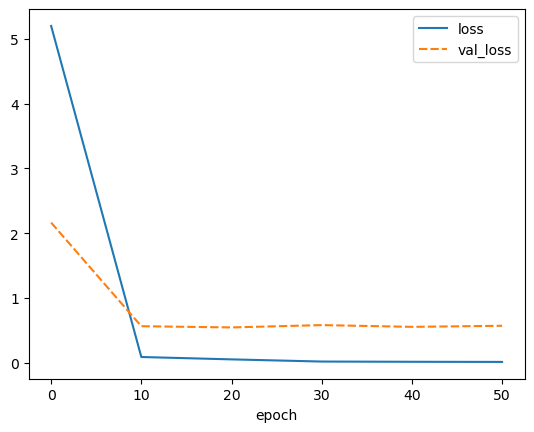

best weights loaded


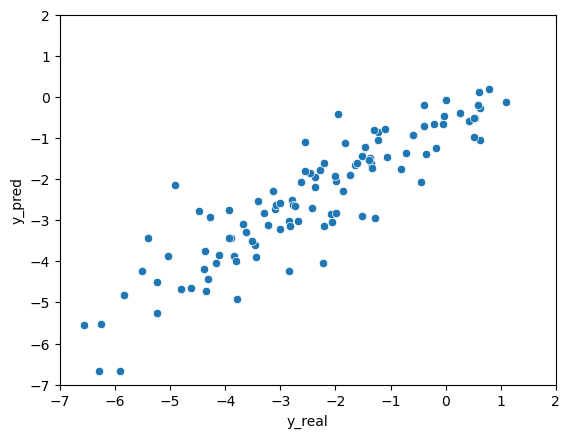

elapsed time: 5.660367727279663
run: 31
{'radius': 2, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9E55310>, <torch.utils.data.dataset.Subset object at 0x0000022559C8A970>, <torch.utils.data.dataset.Subset object at 0x0000022559C8A040>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 7.238267151514689 | Validation Loss 5.0079429149627686
Epoch 10 | Train Loss 0.30663147022326787 | Validation Loss 1.635756492614746
Epoch 20 | Train Loss 0.10922264779607455 | Validation Loss 1.5370568633079529
Epoch 30 | Train Loss 0.07658971752971411 | Validation Loss 1.483511507511139
Epoch 40 | Train Loss 0.07461057454347611 | Validation Loss 1.4107187390327454
Epoch 50 | Train Loss 0.07799277631565929 | Validation Loss 1.34486523270607
Epoch 60 | Train Loss 0.0691618990773956 | Validation Loss 1.358712375164032
Epoch 70 | Train Loss 0.06757104895077645 | Validation Loss 1.3859127163887024
Epoch 80 | Train Loss 0.07170603865136703 | Validation Loss 1.3241609930992126
Epoch 90 | Train Loss 0.07257498372346163 | Validation Loss 1.2699951231479645
Epoch 100 | Train Loss 0.06280871022803088 | Validation Loss 1.3262040615081787
Epoch 110 | Train Loss 0.06579013572384913 | Validation Loss 1.3149809837341309
Epoch 120 | Train Loss 0.08155623028675715 | Validation Los

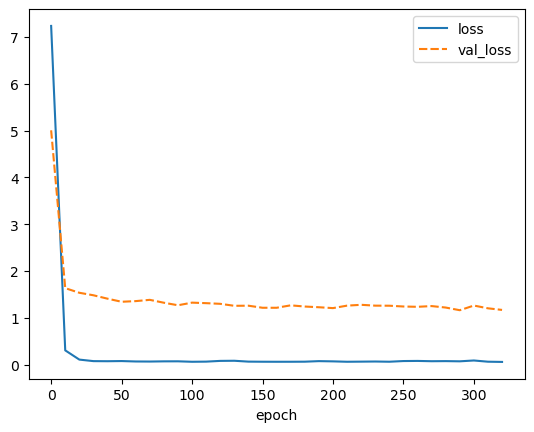

best weights loaded


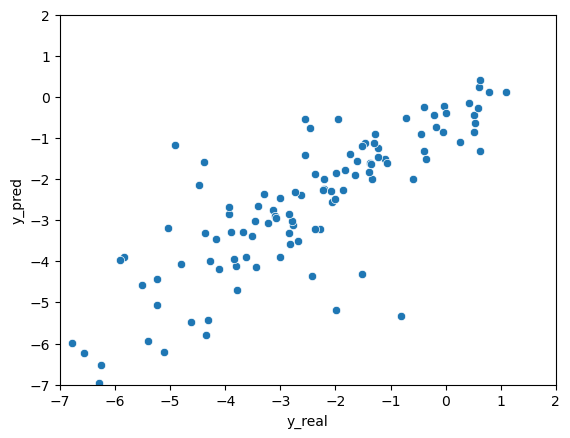

elapsed time: 18.71347403526306
run: 32
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022555F61520>, <torch.utils.data.dataset.Subset object at 0x00000224F8B2AEE0>, <torch.utils.data.dataset.Subset object at 0x00000224F8B075E0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.222786529858907 | Validation Loss 1.164711594581604
Epoch 10 | Train Loss 0.07139673853913943 | Validation Loss 0.5519558787345886
Epoch 20 | Train Loss 0.01926887777323524 | Validation Loss 0.5273529291152954
Epoch 30 | Train Loss 0.04051633427540461 | Validation Loss 0.5622772872447968
Epoch 40 | Train Loss 0.02520897596453627 | Validation Loss 0.4874150902032852
Epoch 50 | Train Loss 0.016575140071411927 | Validation Loss 0.5354385077953339
Epoch 60 | Train Loss 0.023495812341570853 | Validation Loss 0.5309013277292252
Epoch 70 | Train Loss 0.004841310228221119 | Validation Loss 0.4805699437856674
Epoch 80 | Train Loss 0.014133528154343367 | Validation Loss 0.5213073045015335
Epoch 90 | Train Loss 0.0028131463720152774 | Validation Loss 0.48565857112407684
Epoch 100 | Train Loss 0.01898124093810717 | Validation Loss 0.5096965283155441
Epoch 110 | Train Loss 0.005423157130523274 | Validation Loss 0.5069551169872284
Epoch 120 | Train Loss 0.05851642309377591 | V

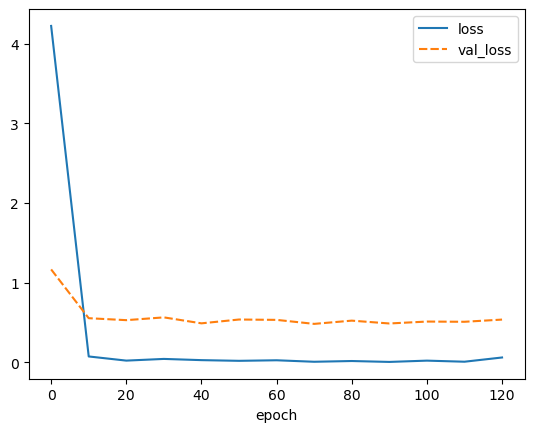

best weights loaded


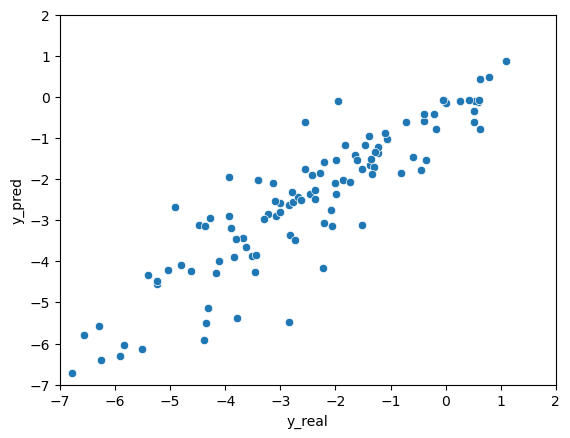

elapsed time: 7.725310325622559
run: 33
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002255725CD00>, <torch.utils.data.dataset.Subset object at 0x00000224F8D0FB50>, <torch.utils.data.dataset.Subset object at 0x00000224F8D0F640>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.187943951288859 | Validation Loss 3.9716713428497314
Epoch 10 | Train Loss 0.15147472620010377 | Validation Loss 1.2777175903320312
Epoch 20 | Train Loss 0.05851187904675802 | Validation Loss 1.1860845983028412
Epoch 30 | Train Loss 0.042914897886415324 | Validation Loss 1.218461811542511
Epoch 40 | Train Loss 0.040575578579834355 | Validation Loss 1.1537625789642334
Epoch 50 | Train Loss 0.058893941591183344 | Validation Loss 1.1989969611167908
Epoch 60 | Train Loss 0.03579410966485739 | Validation Loss 1.1703049838542938
Epoch 70 | Train Loss 0.030042987937728565 | Validation Loss 1.1523845791816711
Epoch 80 | Train Loss 0.041755265463143586 | Validation Loss 1.2524530291557312
Epoch 90 | Train Loss 0.066401307284832 | Validation Loss 1.127116709947586
Epoch 100 | Train Loss 0.03208374964694182 | Validation Loss 1.2572658956050873


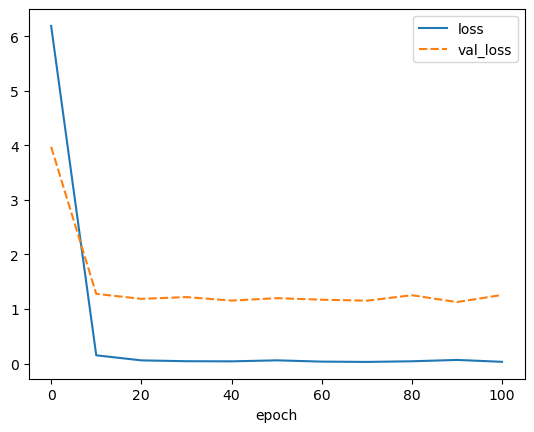

best weights loaded


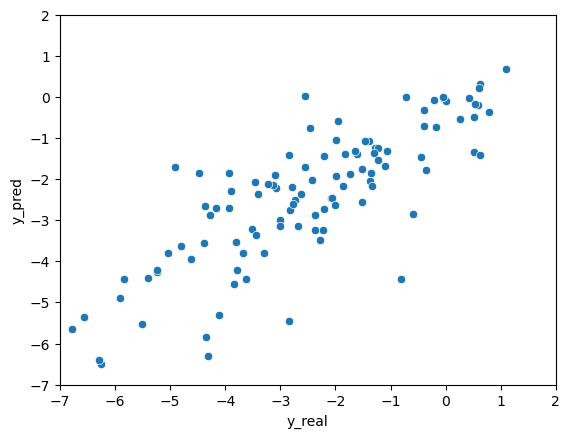

elapsed time: 7.458672285079956
run: 34
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8C694F0>, <torch.utils.data.dataset.Subset object at 0x000002255712A730>, <torch.utils.data.dataset.Subset object at 0x000002255712A2B0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.154536175727844 | Validation Loss 1.2721441388130188
Epoch 10 | Train Loss 0.0782300749172767 | Validation Loss 0.616481751203537
Epoch 20 | Train Loss 0.03203581403940916 | Validation Loss 0.5343015491962433
Epoch 30 | Train Loss 0.05958542947967847 | Validation Loss 0.8706584572792053
Epoch 40 | Train Loss 0.10822128827373187 | Validation Loss 0.6287782490253448
Epoch 50 | Train Loss 0.009741352871060371 | Validation Loss 0.5338495373725891
Epoch 60 | Train Loss 0.0059222722115616 | Validation Loss 0.525323748588562
Epoch 70 | Train Loss 0.00510257037046055 | Validation Loss 0.4895944893360138


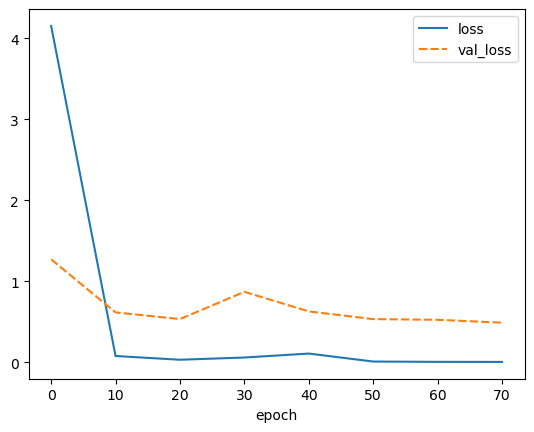

best weights loaded


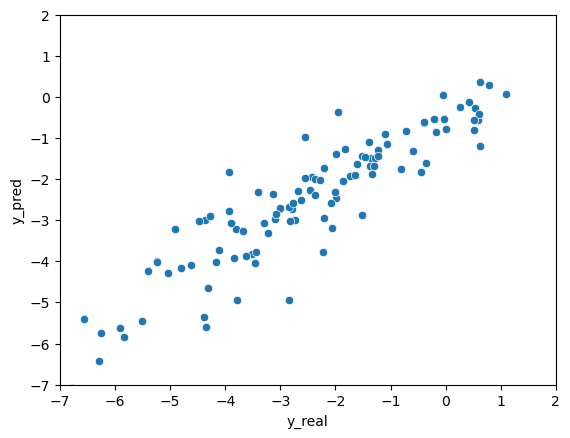

elapsed time: 7.134994745254517
run: 35
{'radius': 3, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9E60B20>, <torch.utils.data.dataset.Subset object at 0x00000224F8ADA6D0>, <torch.utils.data.dataset.Subset object at 0x00000224F8DEA2B0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.861922152837118 | Validation Loss 2.906927704811096
Epoch 10 | Train Loss 0.15159395237763723 | Validation Loss 1.335972011089325
Epoch 20 | Train Loss 0.12643863782286643 | Validation Loss 1.274550586938858
Epoch 30 | Train Loss 0.09345759699742 | Validation Loss 1.371910721063614
Epoch 40 | Train Loss 0.07107125545541446 | Validation Loss 1.330133318901062
Epoch 50 | Train Loss 0.22829508806268375 | Validation Loss 1.3275877237319946
Epoch 60 | Train Loss 0.16398163735866547 | Validation Loss 1.2420763969421387
Epoch 70 | Train Loss 0.06507702817519506 | Validation Loss 1.3714401125907898
Epoch 80 | Train Loss 0.037054056860506536 | Validation Loss 1.2486352324485779
Epoch 90 | Train Loss 0.0435221484862268 | Validation Loss 1.198100060224533
Epoch 100 | Train Loss 0.046030493018527824 | Validation Loss 1.2018984854221344


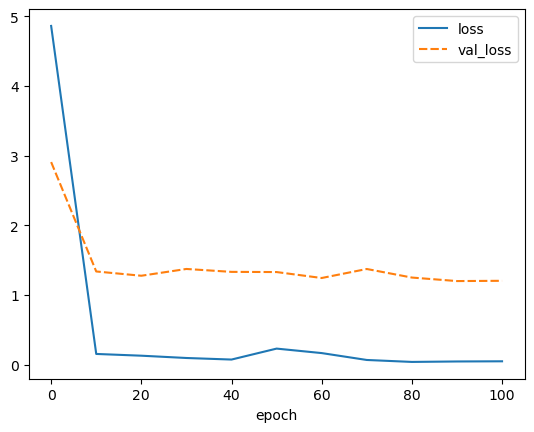

best weights loaded


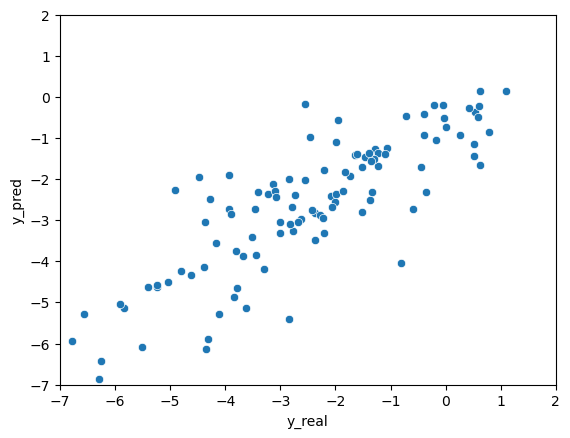

elapsed time: 10.323195457458496
run: 36
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9F40BB0>, <torch.utils.data.dataset.Subset object at 0x0000022559CD8190>, <torch.utils.data.dataset.Subset object at 0x00000224F9E54820>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.961808268229167 | Validation Loss 1.6559112071990967
Epoch 10 | Train Loss 0.11735542565584182 | Validation Loss 0.6177804470062256
Epoch 20 | Train Loss 0.029291444706420103 | Validation Loss 0.5207815170288086
Epoch 30 | Train Loss 0.026373272761702538 | Validation Loss 0.5850931704044342
Epoch 40 | Train Loss 0.04340471737086773 | Validation Loss 0.5632796585559845
Epoch 50 | Train Loss 0.01577736608063181 | Validation Loss 0.5684764981269836
Epoch 60 | Train Loss 0.0036477033514529466 | Validation Loss 0.5397145003080368
Epoch 70 | Train Loss 0.023276811031003795 | Validation Loss 0.5638551563024521
Epoch 80 | Train Loss 0.040942534307638806 | Validation Loss 0.5450769662857056
Epoch 90 | Train Loss 0.016459303287168343 | Validation Loss 0.5459962785243988
Epoch 100 | Train Loss 0.006573995637396971 | Validation Loss 0.5419608652591705


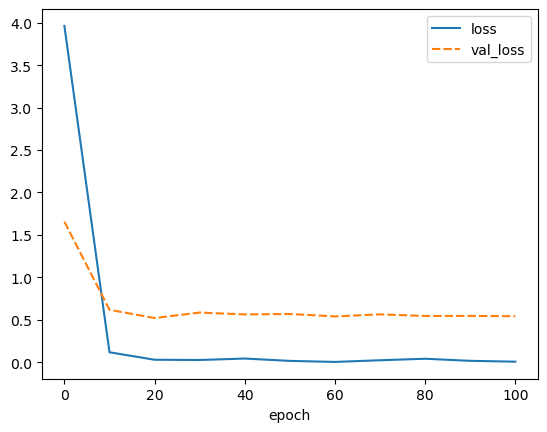

best weights loaded


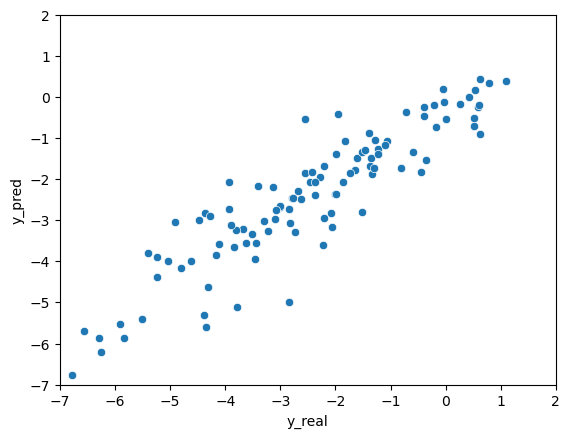

elapsed time: 7.640276670455933
run: 37
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F89B7700>, <torch.utils.data.dataset.Subset object at 0x00000225573C8C10>, <torch.utils.data.dataset.Subset object at 0x00000224F8ADA430>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.736384042104086 | Validation Loss 3.818382143974304
Epoch 10 | Train Loss 0.10331902050723632 | Validation Loss 1.2929137349128723
Epoch 20 | Train Loss 0.38044603938857713 | Validation Loss 1.3865205645561218
Epoch 30 | Train Loss 0.035199350739518805 | Validation Loss 1.2043678760528564
Epoch 40 | Train Loss 0.04959243461489678 | Validation Loss 1.2741534113883972
Epoch 50 | Train Loss 0.07630102535088858 | Validation Loss 1.2826237678527832
Epoch 60 | Train Loss 0.048006399224201836 | Validation Loss 1.2996565699577332
Epoch 70 | Train Loss 0.08582645431160926 | Validation Loss 1.4226961731910706


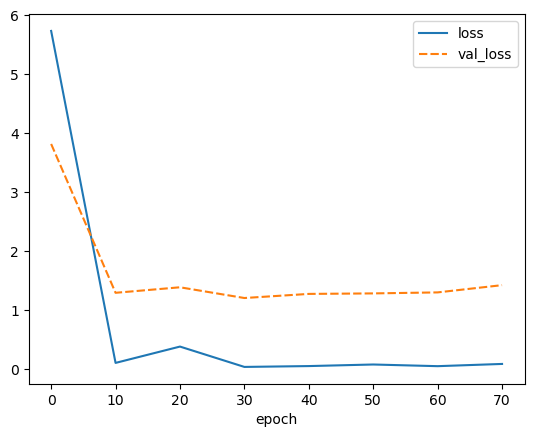

best weights loaded


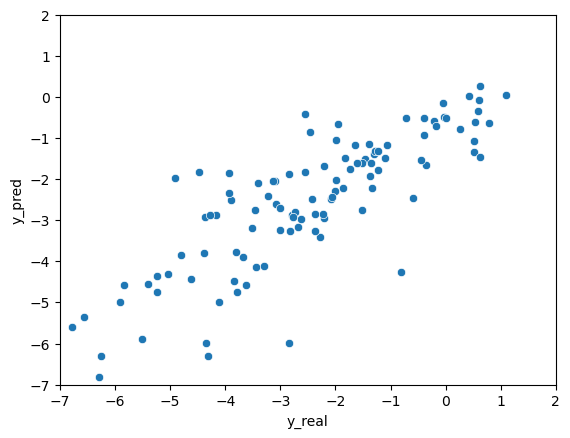

elapsed time: 5.513758420944214
run: 38
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8CFE520>, <torch.utils.data.dataset.Subset object at 0x00000225572F6D60>, <torch.utils.data.dataset.Subset object at 0x00000225572F6430>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.964123137791952 | Validation Loss 1.5322524905204773
Epoch 10 | Train Loss 0.10934584587812424 | Validation Loss 0.5752838253974915
Epoch 20 | Train Loss 0.03551280442625284 | Validation Loss 0.5499576330184937
Epoch 30 | Train Loss 0.0119419039071848 | Validation Loss 0.5213901698589325
Epoch 40 | Train Loss 0.01018120941395561 | Validation Loss 0.5251981914043427
Epoch 50 | Train Loss 0.028256339424600204 | Validation Loss 0.5222896188497543
Epoch 60 | Train Loss 0.004725167993456125 | Validation Loss 0.531764030456543
Epoch 70 | Train Loss 0.004248071617136399 | Validation Loss 0.5018618553876877
Epoch 80 | Train Loss 0.013610855676233768 | Validation Loss 0.5064382702112198
Epoch 90 | Train Loss 0.018692160785819093 | Validation Loss 0.5456666946411133
Epoch 100 | Train Loss 0.008982413075864315 | Validation Loss 0.5160147398710251
Epoch 110 | Train Loss 0.006702528397242228 | Validation Loss 0.5428740233182907
Epoch 120 | Train Loss 0.005935839967181286 | Va

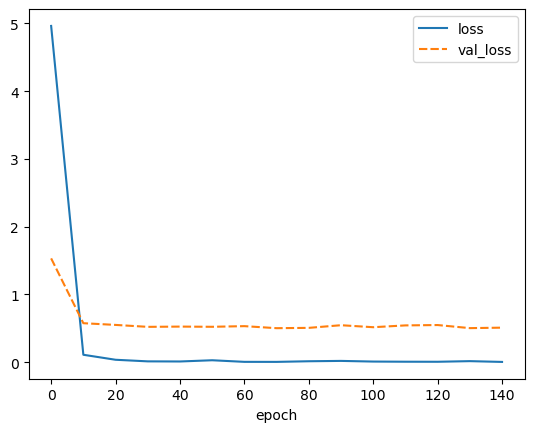

best weights loaded


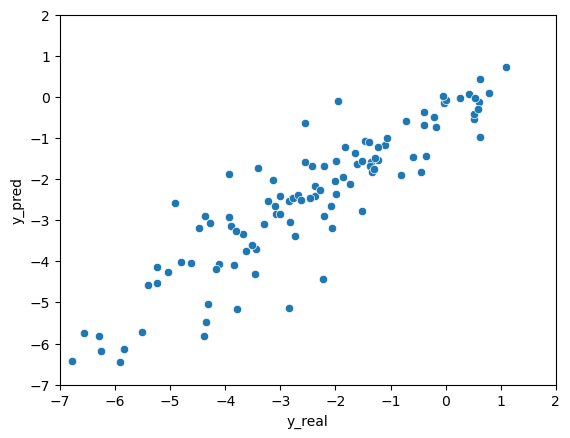

elapsed time: 8.589826107025146
run: 39
{'radius': 3, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002255727BEB0>, <torch.utils.data.dataset.Subset object at 0x00000224F8BA0550>, <torch.utils.data.dataset.Subset object at 0x00000224F8BA0910>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.676239983240763 | Validation Loss 4.891079664230347
Epoch 10 | Train Loss 0.33523773153622943 | Validation Loss 1.5810585021972656
Epoch 20 | Train Loss 0.05682379593296597 | Validation Loss 1.380782961845398
Epoch 30 | Train Loss 0.058965109599133335 | Validation Loss 1.3829123973846436
Epoch 40 | Train Loss 0.036678945335249104 | Validation Loss 1.3532174825668335
Epoch 50 | Train Loss 0.04949412320662911 | Validation Loss 1.4076448678970337
Epoch 60 | Train Loss 0.03205156301458677 | Validation Loss 1.3108945488929749
Epoch 70 | Train Loss 0.035454325610771775 | Validation Loss 1.348059058189392
Epoch 80 | Train Loss 0.041164749891807635 | Validation Loss 1.2955152988433838
Epoch 90 | Train Loss 0.03134529140467445 | Validation Loss 1.3124454021453857
Epoch 100 | Train Loss 0.13437425947437684 | Validation Loss 1.4375564455986023
Epoch 110 | Train Loss 0.0510251892109712 | Validation Loss 1.3309985995292664
Epoch 120 | Train Loss 0.02820517822789649 | Validati

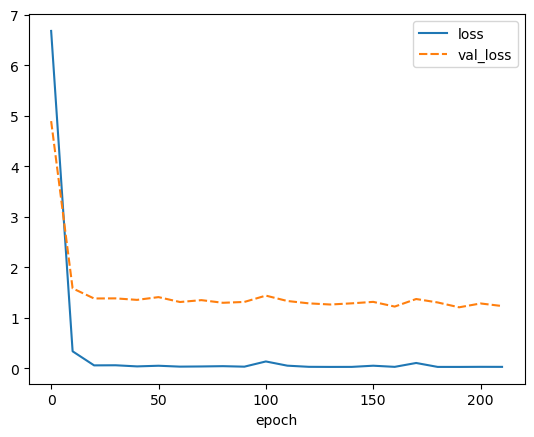

best weights loaded


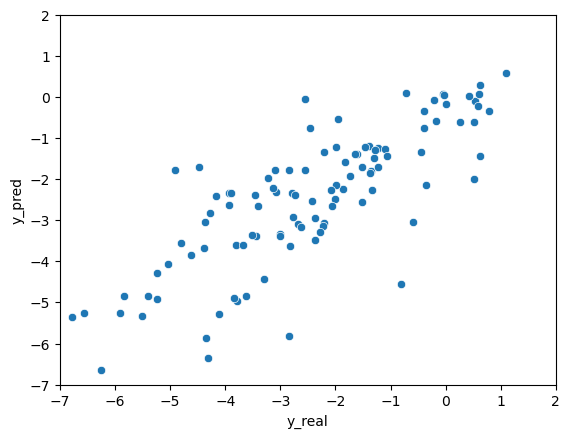

elapsed time: 13.069761037826538
run: 40
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F89ED1C0>, <torch.utils.data.dataset.Subset object at 0x000002255FA00970>, <torch.utils.data.dataset.Subset object at 0x000002255734AAC0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.216691509882609 | Validation Loss 1.117977499961853
Epoch 10 | Train Loss 0.05652489513158798 | Validation Loss 0.4772096276283264
Epoch 20 | Train Loss 0.03101090844720602 | Validation Loss 0.5353520214557648
Epoch 30 | Train Loss 0.01046497393399477 | Validation Loss 0.508421927690506
Epoch 40 | Train Loss 0.00866512730717659 | Validation Loss 0.47045107185840607
Epoch 50 | Train Loss 0.01306526546056072 | Validation Loss 0.4985072910785675


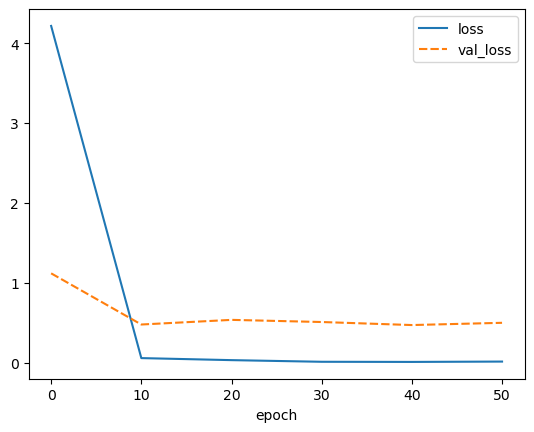

best weights loaded


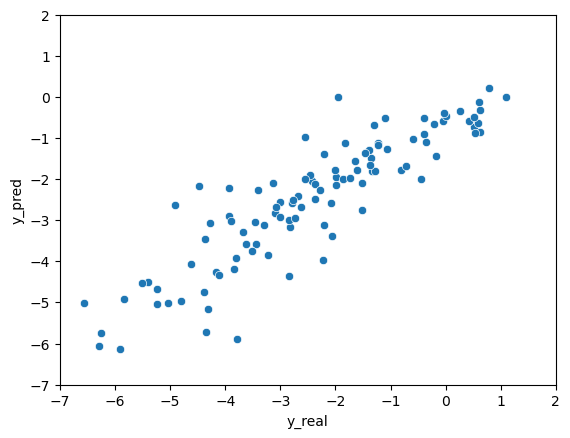

elapsed time: 6.447284460067749
run: 41
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8BE78E0>, <torch.utils.data.dataset.Subset object at 0x00000224F8C722B0>, <torch.utils.data.dataset.Subset object at 0x00000225652AD6D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.473851569493612 | Validation Loss 3.8711196184158325
Epoch 10 | Train Loss 0.1612430805961291 | Validation Loss 1.380066990852356
Epoch 20 | Train Loss 0.0787628044684728 | Validation Loss 1.470808506011963
Epoch 30 | Train Loss 0.11012231378505627 | Validation Loss 1.3137787580490112
Epoch 40 | Train Loss 0.040735435020178554 | Validation Loss 1.2246258854866028
Epoch 50 | Train Loss 0.03347990197750429 | Validation Loss 1.3173157274723053
Epoch 60 | Train Loss 0.04319689959908525 | Validation Loss 1.2703707218170166
Epoch 70 | Train Loss 0.035914622456766666 | Validation Loss 1.2936446070671082
Epoch 80 | Train Loss 0.03466255996997158 | Validation Loss 1.2180643677711487
Epoch 90 | Train Loss 0.029669452086091043 | Validation Loss 1.2398318648338318
Epoch 100 | Train Loss 0.08113356654842695 | Validation Loss 1.2227596044540405
Epoch 110 | Train Loss 0.05823585589726766 | Validation Loss 1.196871817111969
Epoch 120 | Train Loss 0.08763980977237225 | Validation

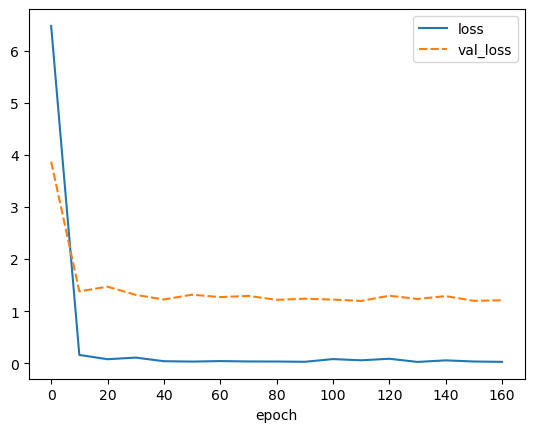

best weights loaded


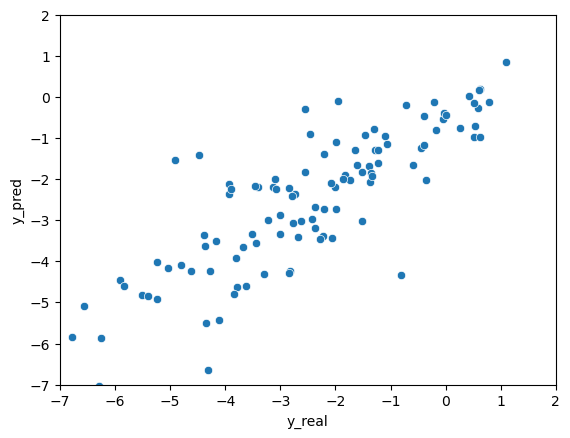

elapsed time: 16.76952624320984
run: 42
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000225572CB4C0>, <torch.utils.data.dataset.Subset object at 0x00000225573D4310>, <torch.utils.data.dataset.Subset object at 0x00000224F9E555E0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.431716740131378 | Validation Loss 1.2392255663871765
Epoch 10 | Train Loss 0.22198737437526386 | Validation Loss 0.9598358869552612
Epoch 20 | Train Loss 0.03793505219121774 | Validation Loss 0.5305672287940979
Epoch 30 | Train Loss 0.07601802709201971 | Validation Loss 0.8380726277828217
Epoch 40 | Train Loss 0.04659122824668884 | Validation Loss 0.5672120153903961
Epoch 50 | Train Loss 0.19945696194966633 | Validation Loss 1.231801599264145
Epoch 60 | Train Loss 0.013734498294070363 | Validation Loss 0.5754701644182205
Epoch 70 | Train Loss 0.006027893074012051 | Validation Loss 0.5012819468975067
Epoch 80 | Train Loss 0.0041449749376624824 | Validation Loss 0.5363985449075699
Epoch 90 | Train Loss 0.01206648424267769 | Validation Loss 0.5461696088314056
Epoch 100 | Train Loss 0.008624773068974415 | Validation Loss 0.5203352272510529
Epoch 110 | Train Loss 0.0008937226336759826 | Validation Loss 0.5200409591197968
Epoch 120 | Train Loss 0.0011101539945229887 | 

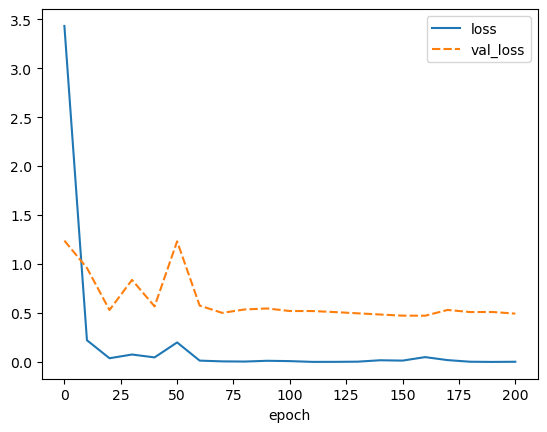

best weights loaded


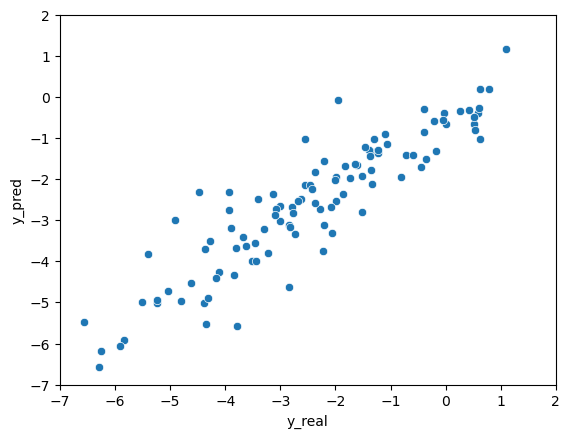

elapsed time: 24.893226385116577
run: 43
{'radius': 3, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224D949E910>, <torch.utils.data.dataset.Subset object at 0x00000225652FAFD0>, <torch.utils.data.dataset.Subset object at 0x00000225652EE910>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.47135294675827 | Validation Loss 4.070291519165039
Epoch 10 | Train Loss 0.21118629078070322 | Validation Loss 1.505786418914795
Epoch 20 | Train Loss 0.09140613892426093 | Validation Loss 1.3720395267009735
Epoch 30 | Train Loss 0.11473538267115752 | Validation Loss 1.3675618171691895
Epoch 40 | Train Loss 0.24800815284252167 | Validation Loss 1.7366706132888794
Epoch 50 | Train Loss 0.11596606944998106 | Validation Loss 1.3139985799789429
Epoch 60 | Train Loss 0.05735641531646252 | Validation Loss 1.520946204662323
Epoch 70 | Train Loss 0.03310954720557978 | Validation Loss 1.3152280747890472
Epoch 80 | Train Loss 0.046370326168835165 | Validation Loss 1.22230064868927
Epoch 90 | Train Loss 0.08390116517742476 | Validation Loss 1.2473173141479492
Epoch 100 | Train Loss 0.12306270065406959 | Validation Loss 1.7347159385681152
Epoch 110 | Train Loss 0.033268767036497594 | Validation Loss 1.2122474312782288
Epoch 120 | Train Loss 0.03629695408356686 | Validation L

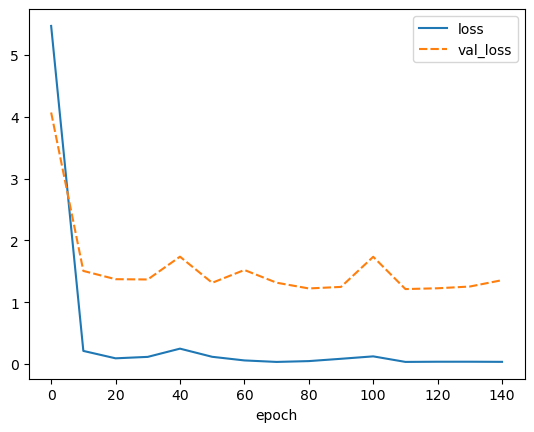

best weights loaded


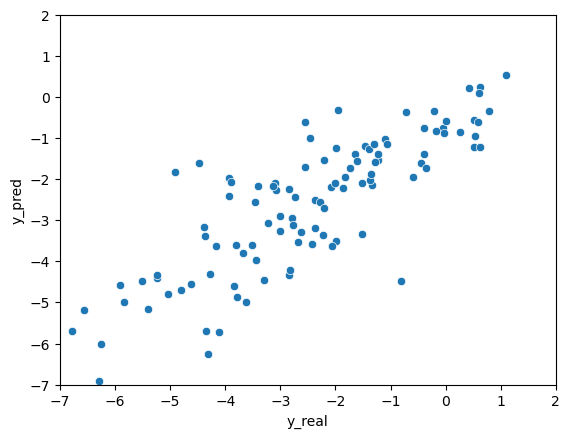

elapsed time: 16.67246413230896
run: 44
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000225572E82E0>, <torch.utils.data.dataset.Subset object at 0x000002255609B5B0>, <torch.utils.data.dataset.Subset object at 0x000002255609BA90>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.22743034362793 | Validation Loss 2.157322347164154
Epoch 10 | Train Loss 0.07040030304342508 | Validation Loss 0.6380414664745331
Epoch 20 | Train Loss 0.040235766644279164 | Validation Loss 0.5700816810131073
Epoch 30 | Train Loss 0.030381569794068735 | Validation Loss 0.5314013957977295
Epoch 40 | Train Loss 0.013565174226338664 | Validation Loss 0.49176913499832153
Epoch 50 | Train Loss 0.0569406316926082 | Validation Loss 0.6542003750801086
Epoch 60 | Train Loss 0.12602814733982087 | Validation Loss 0.6493934392929077
Epoch 70 | Train Loss 0.0074128881096839905 | Validation Loss 0.5180385708808899
Epoch 80 | Train Loss 0.011992000338310996 | Validation Loss 0.568543016910553
Epoch 90 | Train Loss 0.002677775329599778 | Validation Loss 0.5297809541225433


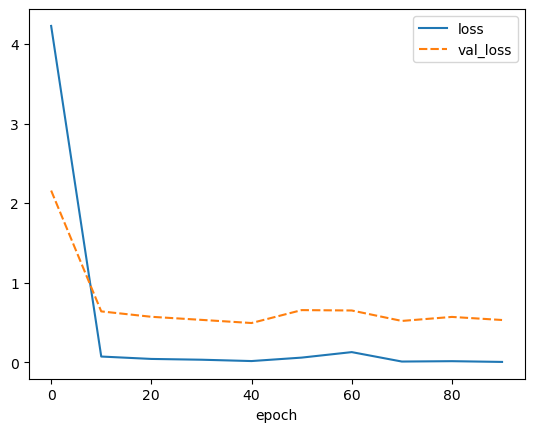

best weights loaded


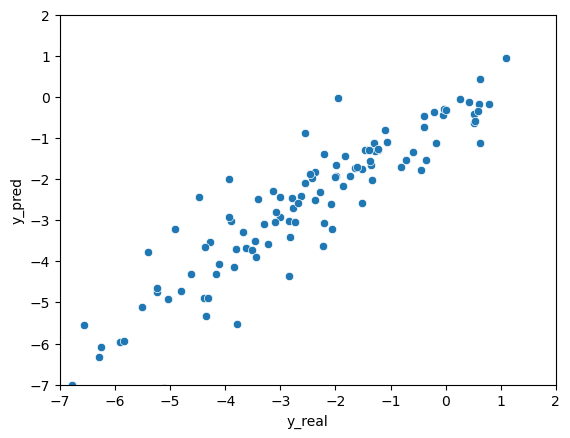

elapsed time: 7.512328386306763
run: 45
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8CDED60>, <torch.utils.data.dataset.Subset object at 0x00000225652FA250>, <torch.utils.data.dataset.Subset object at 0x00000225652FA670>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.022576443354288 | Validation Loss 3.942712903022766
Epoch 10 | Train Loss 0.11174324999252955 | Validation Loss 1.2360003590583801
Epoch 20 | Train Loss 0.10074754506349563 | Validation Loss 1.1171014308929443
Epoch 30 | Train Loss 0.11461522383615375 | Validation Loss 1.128233164548874
Epoch 40 | Train Loss 0.04649357715000709 | Validation Loss 1.185848593711853
Epoch 50 | Train Loss 0.05247270700832208 | Validation Loss 1.175087183713913
Epoch 60 | Train Loss 0.035970467949906985 | Validation Loss 1.0781619399785995
Epoch 70 | Train Loss 0.05719029096265634 | Validation Loss 1.2596774101257324
Epoch 80 | Train Loss 0.05420265185336272 | Validation Loss 1.2108052968978882
Epoch 90 | Train Loss 0.05942480228841305 | Validation Loss 1.1489752531051636


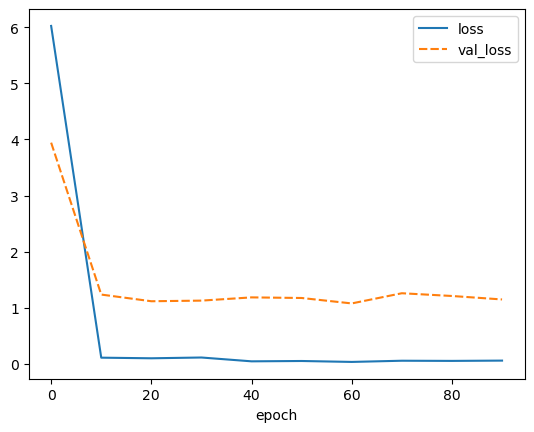

best weights loaded


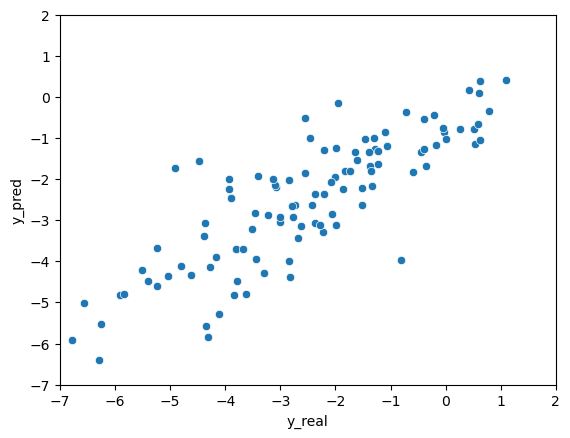

elapsed time: 7.047102928161621
run: 46
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8D79460>, <torch.utils.data.dataset.Subset object at 0x000002255609B2B0>, <torch.utils.data.dataset.Subset object at 0x000002255609B130>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.137476905186971 | Validation Loss 1.5262901782989502
Epoch 10 | Train Loss 0.07307710846265157 | Validation Loss 0.56019726395607
Epoch 20 | Train Loss 0.029885279852896927 | Validation Loss 0.5551042556762695
Epoch 30 | Train Loss 0.017504168053468067 | Validation Loss 0.5410798192024231
Epoch 40 | Train Loss 0.023441719791541495 | Validation Loss 0.5399965643882751
Epoch 50 | Train Loss 0.013668489580353101 | Validation Loss 0.4724689871072769
Epoch 60 | Train Loss 0.010379590978845953 | Validation Loss 0.4791971445083618
Epoch 70 | Train Loss 0.0022638695508552095 | Validation Loss 0.4971785396337509
Epoch 80 | Train Loss 0.016186038808276255 | Validation Loss 0.5036944597959518
Epoch 90 | Train Loss 0.010634686301151912 | Validation Loss 0.4895878732204437
Epoch 100 | Train Loss 0.008655987198775012 | Validation Loss 0.4804527163505554
Epoch 110 | Train Loss 0.017778638439873855 | Validation Loss 0.5082567632198334
Epoch 120 | Train Loss 0.0033346037613227963

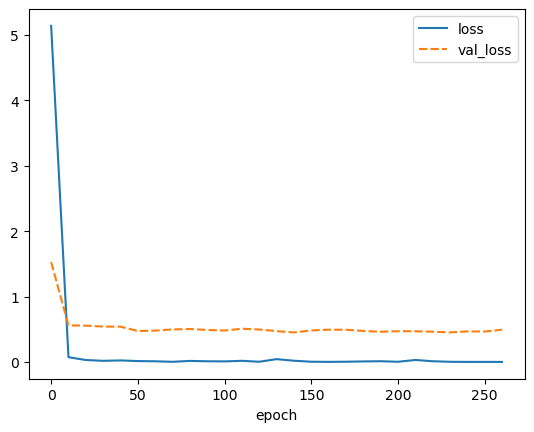

best weights loaded


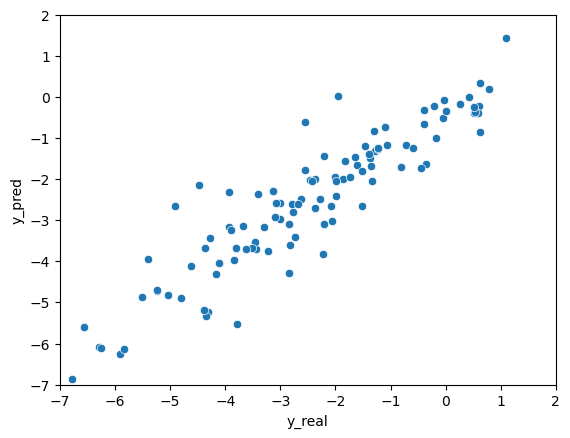

elapsed time: 14.180083274841309
run: 47
{'radius': 3, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000225571A0C10>, <torch.utils.data.dataset.Subset object at 0x00000225572987F0>, <torch.utils.data.dataset.Subset object at 0x0000022557261100>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 7.17178791364034 | Validation Loss 4.463685750961304
Epoch 10 | Train Loss 0.19575367470582325 | Validation Loss 1.3513213992118835
Epoch 20 | Train Loss 0.1134893356822431 | Validation Loss 1.411296010017395
Epoch 30 | Train Loss 0.04541863617487252 | Validation Loss 1.2743280827999115
Epoch 40 | Train Loss 0.15679282744725545 | Validation Loss 1.4092450141906738
Epoch 50 | Train Loss 0.032417578040622175 | Validation Loss 1.3530458509922028
Epoch 60 | Train Loss 0.04472374723603328 | Validation Loss 1.3115947842597961
Epoch 70 | Train Loss 0.03143001181694369 | Validation Loss 1.2664440870285034
Epoch 80 | Train Loss 0.03413810196022193 | Validation Loss 1.343247413635254
Epoch 90 | Train Loss 0.029575515530693035 | Validation Loss 1.2017912566661835
Epoch 100 | Train Loss 0.05639475826174021 | Validation Loss 1.2218326330184937
Epoch 110 | Train Loss 0.050126457555840415 | Validation Loss 1.208797037601471
Epoch 120 | Train Loss 0.029174590405697625 | Validation

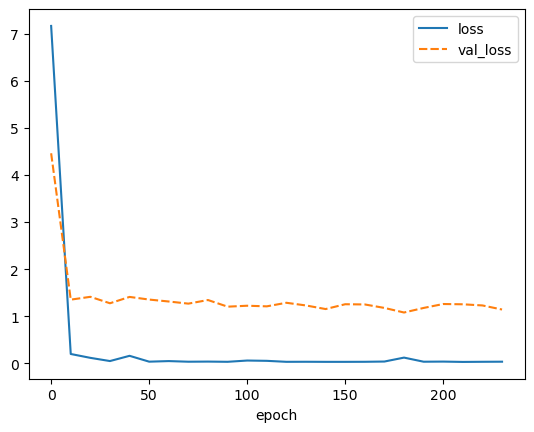

best weights loaded


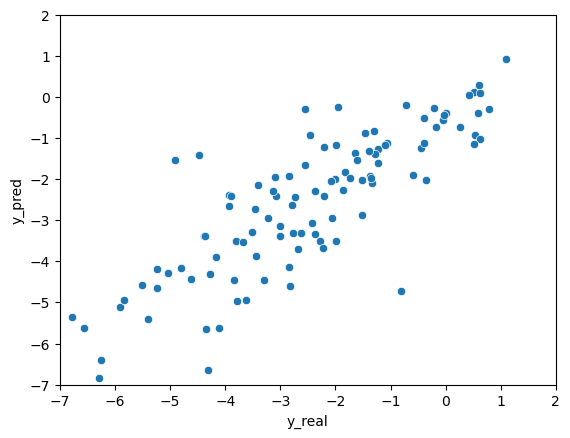

elapsed time: 13.345868349075317
run: 48
{'radius': 4, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000225571991F0>, <torch.utils.data.dataset.Subset object at 0x000002255609B670>, <torch.utils.data.dataset.Subset object at 0x00000224F9E506D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 3.9726343909899393 | Validation Loss 1.4281685948371887
Epoch 10 | Train Loss 0.052310046677788095 | Validation Loss 0.6007070541381836
Epoch 20 | Train Loss 0.015173445160811146 | Validation Loss 0.6326756179332733
Epoch 30 | Train Loss 0.04334427018960317 | Validation Loss 0.6504908204078674
Epoch 40 | Train Loss 0.009115414057547847 | Validation Loss 0.6030304133892059
Epoch 50 | Train Loss 0.009267774907251199 | Validation Loss 0.5998008549213409
Epoch 60 | Train Loss 0.02183468472212553 | Validation Loss 0.5958256721496582
Epoch 70 | Train Loss 0.0064619439964493115 | Validation Loss 0.6036547720432281
Epoch 80 | Train Loss 0.006070415644596021 | Validation Loss 0.6009426116943359
Epoch 90 | Train Loss 0.0015524149600726863 | Validation Loss 0.6165322959423065


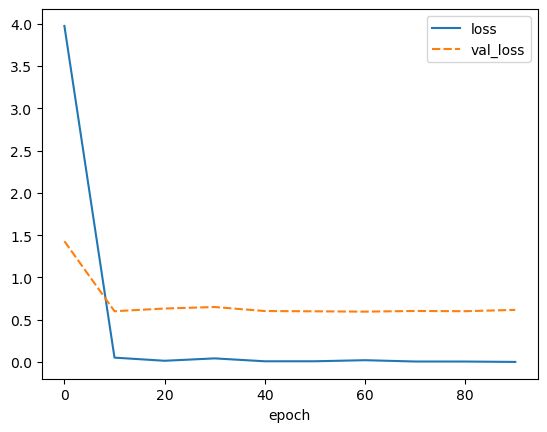

best weights loaded


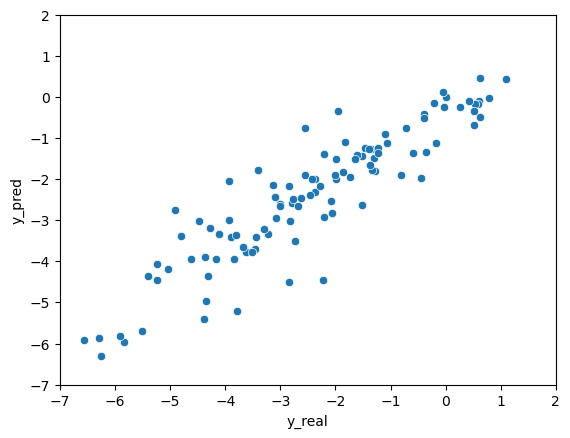

elapsed time: 6.199399471282959
run: 49
{'radius': 4, 'fpSize': 1024, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000225571DFF40>, <torch.utils.data.dataset.Subset object at 0x00000225560975B0>, <torch.utils.data.dataset.Subset object at 0x0000022556097460>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.582029469807943 | Validation Loss 3.752171277999878
Epoch 10 | Train Loss 0.1397724394996961 | Validation Loss 1.621662974357605
Epoch 20 | Train Loss 0.014555842382833362 | Validation Loss 1.4889232516288757
Epoch 30 | Train Loss 0.01667423571149508 | Validation Loss 1.4441744685173035
Epoch 40 | Train Loss 0.01170313159818761 | Validation Loss 1.5472725629806519
Epoch 50 | Train Loss 0.03006717227399349 | Validation Loss 1.4772936701774597
Epoch 60 | Train Loss 0.01680041045571367 | Validation Loss 1.5455029606819153
Epoch 70 | Train Loss 0.01608379588772853 | Validation Loss 1.472252756357193
Epoch 80 | Train Loss 0.0249080711354812 | Validation Loss 1.5123994946479797
Epoch 90 | Train Loss 0.006007662877285232 | Validation Loss 1.4173971116542816
Epoch 100 | Train Loss 0.005523624826067438 | Validation Loss 1.414110779762268
Epoch 110 | Train Loss 0.010789734947805604 | Validation Loss 1.3965921998023987
Epoch 120 | Train Loss 0.007654792877535025 | Validatio

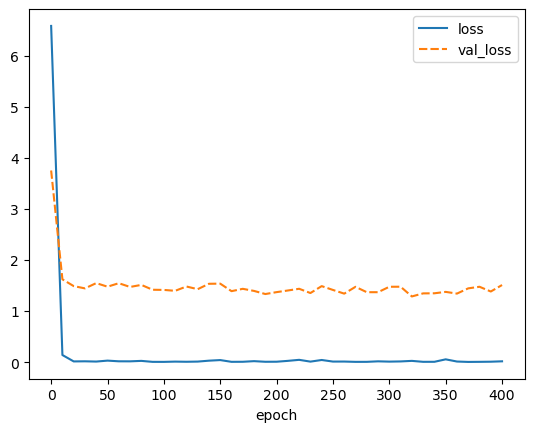

best weights loaded


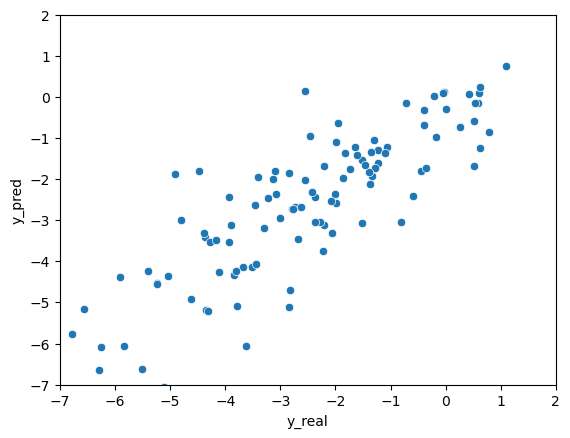

elapsed time: 22.543865442276
run: 50
{'radius': 4, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000225573D3130>, <torch.utils.data.dataset.Subset object at 0x00000224F9FA0BE0>, <torch.utils.data.dataset.Subset object at 0x00000224F8BA0BB0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.12306014696757 | Validation Loss 3.497275948524475
Epoch 10 | Train Loss 0.08241616239150365 | Validation Loss 0.6989364624023438
Epoch 20 | Train Loss 0.018352360526720683 | Validation Loss 0.6004728078842163
Epoch 30 | Train Loss 0.014688364757845799 | Validation Loss 0.6462766826152802
Epoch 40 | Train Loss 0.06976052050789197 | Validation Loss 0.6400547623634338
Epoch 50 | Train Loss 0.2129314380387465 | Validation Loss 0.6971974074840546
Epoch 60 | Train Loss 0.027699074459572634 | Validation Loss 0.6517708599567413
Epoch 70 | Train Loss 0.0008630399863856534 | Validation Loss 0.6227956712245941
Epoch 80 | Train Loss 0.0011267648107605055 | Validation Loss 0.6083376705646515
Epoch 90 | Train Loss 0.0024470200490516922 | Validation Loss 0.6204231828451157


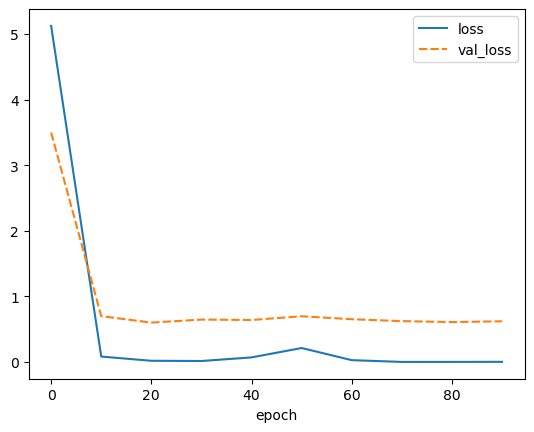

best weights loaded


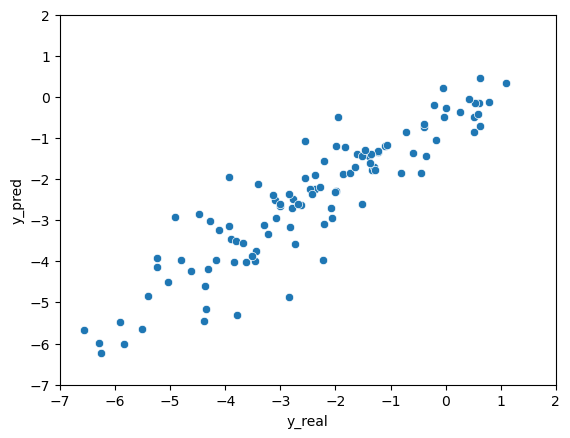

elapsed time: 8.698818683624268
run: 51
{'radius': 4, 'fpSize': 1024, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8A4F5B0>, <torch.utils.data.dataset.Subset object at 0x0000022557285550>, <torch.utils.data.dataset.Subset object at 0x00000225573D30A0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.435066970189412 | Validation Loss 4.443364381790161
Epoch 10 | Train Loss 0.14018183623751004 | Validation Loss 1.3191543221473694
Epoch 20 | Train Loss 0.02845100002984206 | Validation Loss 1.3102442026138306
Epoch 30 | Train Loss 0.03689516832431158 | Validation Loss 1.4504124522209167
Epoch 40 | Train Loss 0.04826219044625759 | Validation Loss 1.401145577430725
Epoch 50 | Train Loss 0.017900829343125223 | Validation Loss 1.5469136238098145


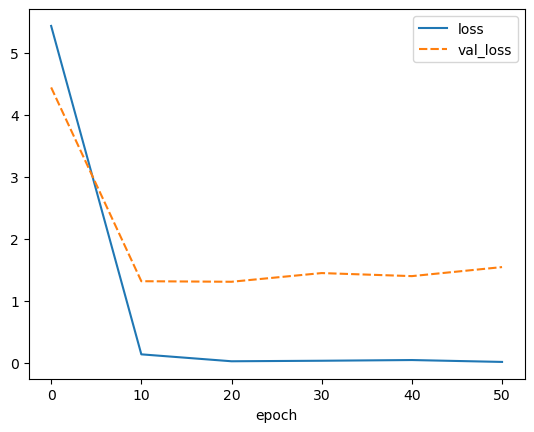

best weights loaded


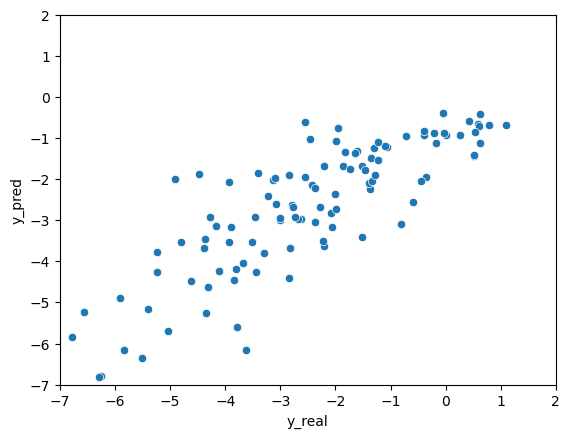

elapsed time: 5.509771108627319
run: 52
{'radius': 4, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8C5C400>, <torch.utils.data.dataset.Subset object at 0x0000022557169DF0>, <torch.utils.data.dataset.Subset object at 0x00000225571696D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.362184961636861 | Validation Loss 2.0688443779945374
Epoch 10 | Train Loss 0.1471019079287847 | Validation Loss 0.6998886168003082
Epoch 20 | Train Loss 0.023383998374144236 | Validation Loss 0.5938967764377594
Epoch 30 | Train Loss 0.01438535749912262 | Validation Loss 0.5768892914056778
Epoch 40 | Train Loss 0.007858031161595136 | Validation Loss 0.6220401227474213
Epoch 50 | Train Loss 0.029750471624235313 | Validation Loss 0.5837988555431366
Epoch 60 | Train Loss 0.004689341418755552 | Validation Loss 0.5818826854228973
Epoch 70 | Train Loss 0.08282921072095632 | Validation Loss 0.6878668665885925
Epoch 80 | Train Loss 0.007810031777868668 | Validation Loss 0.5740736126899719
Epoch 90 | Train Loss 0.0007421652281967302 | Validation Loss 0.5977101027965546
Epoch 100 | Train Loss 0.023724234600861868 | Validation Loss 0.6368236839771271
Epoch 110 | Train Loss 0.014687595206002395 | Validation Loss 0.5821807384490967


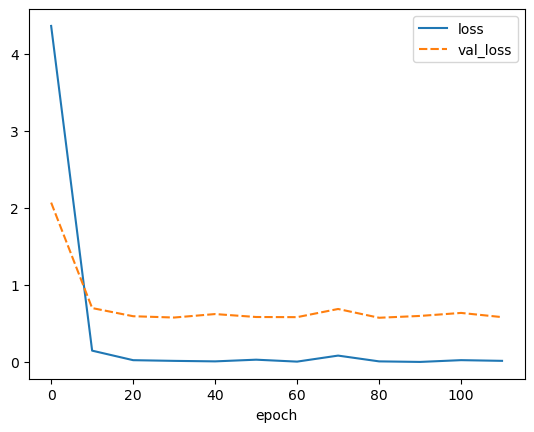

best weights loaded


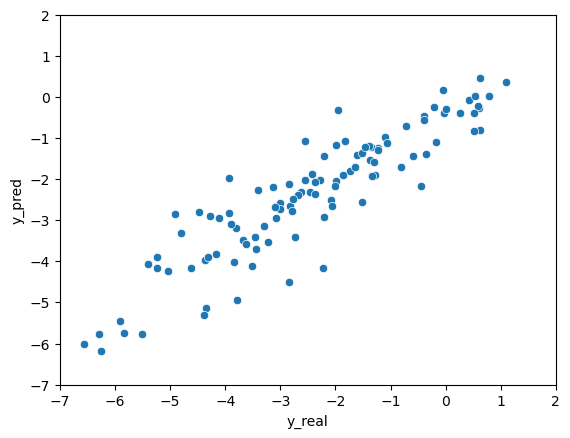

elapsed time: 7.175679922103882
run: 53
{'radius': 4, 'fpSize': 1024, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9EF44C0>, <torch.utils.data.dataset.Subset object at 0x000002255F94F7F0>, <torch.utils.data.dataset.Subset object at 0x000002255F94F6A0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.794359302520752 | Validation Loss 3.9189302921295166
Epoch 10 | Train Loss 0.0707531360288461 | Validation Loss 1.4817092418670654
Epoch 20 | Train Loss 0.11240272000432014 | Validation Loss 1.4440255761146545
Epoch 30 | Train Loss 0.022795743371049563 | Validation Loss 1.4097378253936768
Epoch 40 | Train Loss 0.019680741894990205 | Validation Loss 1.3788712620735168
Epoch 50 | Train Loss 0.08367601869006952 | Validation Loss 1.344735860824585
Epoch 60 | Train Loss 0.23828371266523998 | Validation Loss 1.473017930984497
Epoch 70 | Train Loss 0.011813924772044022 | Validation Loss 1.4843665957450867
Epoch 80 | Train Loss 0.006262718063468734 | Validation Loss 1.5677313804626465
Epoch 90 | Train Loss 0.006509995615730683 | Validation Loss 1.475260853767395


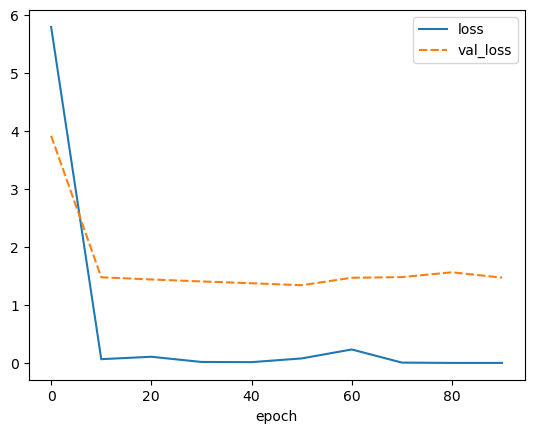

best weights loaded


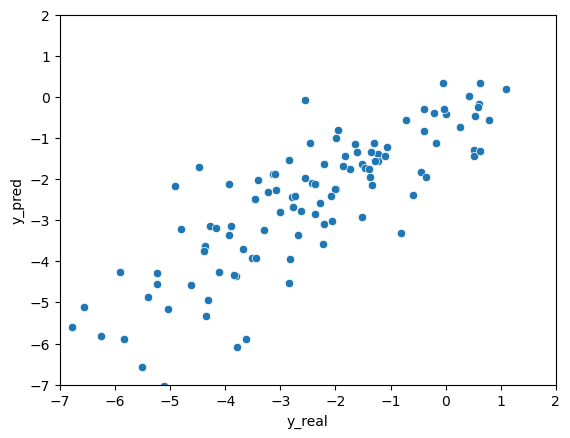

elapsed time: 6.31003212928772
run: 54
{'radius': 4, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9E6C0D0>, <torch.utils.data.dataset.Subset object at 0x00000225571EB5B0>, <torch.utils.data.dataset.Subset object at 0x00000225571EBAF0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.849204381306966 | Validation Loss 1.6359016299247742
Epoch 10 | Train Loss 0.09403334731856981 | Validation Loss 0.6728425323963165
Epoch 20 | Train Loss 0.019478926605855425 | Validation Loss 0.6797260642051697
Epoch 30 | Train Loss 0.0163630166867127 | Validation Loss 0.713688462972641
Epoch 40 | Train Loss 0.014561546803452074 | Validation Loss 0.6987378299236298
Epoch 50 | Train Loss 0.01139052671690782 | Validation Loss 0.6999266743659973
Epoch 60 | Train Loss 0.002816421895598372 | Validation Loss 0.6450100243091583
Epoch 70 | Train Loss 0.023707111412659288 | Validation Loss 0.677882730960846
Epoch 80 | Train Loss 0.011681382241658867 | Validation Loss 0.6841559112071991
Epoch 90 | Train Loss 0.024642142513766885 | Validation Loss 0.6667333245277405
Epoch 100 | Train Loss 0.006774838920682669 | Validation Loss 0.644307404756546
Epoch 110 | Train Loss 0.00946650398739924 | Validation Loss 0.6571739912033081
Epoch 120 | Train Loss 0.00552414587388436 | Valid

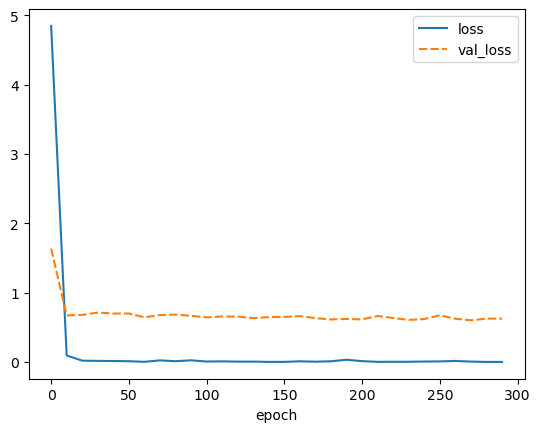

best weights loaded


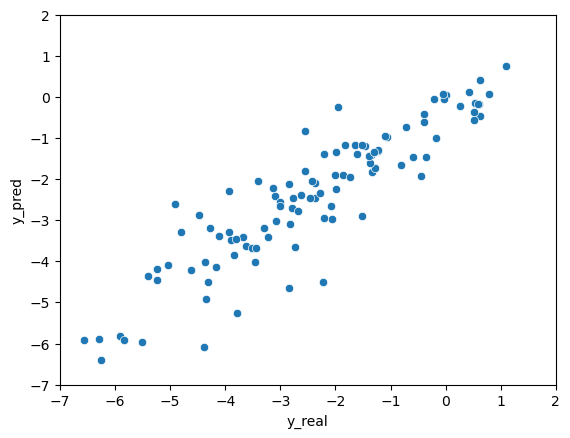

elapsed time: 14.911616563796997
run: 55
{'radius': 4, 'fpSize': 1024, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8D6F0A0>, <torch.utils.data.dataset.Subset object at 0x00000224F8B64580>, <torch.utils.data.dataset.Subset object at 0x00000224F8B64A60>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.8197504361470545 | Validation Loss 5.223572015762329
Epoch 10 | Train Loss 0.2605339994033178 | Validation Loss 1.6162740588188171
Epoch 20 | Train Loss 0.027196383134772382 | Validation Loss 1.5684857964515686
Epoch 30 | Train Loss 0.010761095917162795 | Validation Loss 1.5357729196548462
Epoch 40 | Train Loss 0.01484005805104971 | Validation Loss 1.601972758769989
Epoch 50 | Train Loss 0.050133955230315524 | Validation Loss 1.5162380933761597
Epoch 60 | Train Loss 0.006471915061896046 | Validation Loss 1.5211151838302612
Epoch 70 | Train Loss 0.005744589312234894 | Validation Loss 1.5705136060714722
Epoch 80 | Train Loss 0.006614188888731102 | Validation Loss 1.4491660296916962
Epoch 90 | Train Loss 0.02078837944815556 | Validation Loss 1.4600844383239746
Epoch 100 | Train Loss 0.017013850249350072 | Validation Loss 1.5555280447006226
Epoch 110 | Train Loss 0.008409041631966829 | Validation Loss 1.4584715366363525
Epoch 120 | Train Loss 0.01286360655600826 | Va

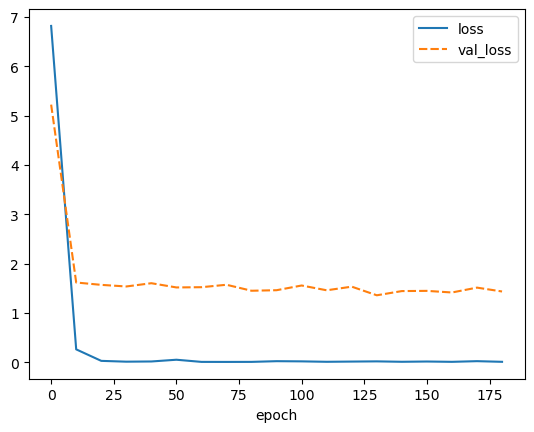

best weights loaded


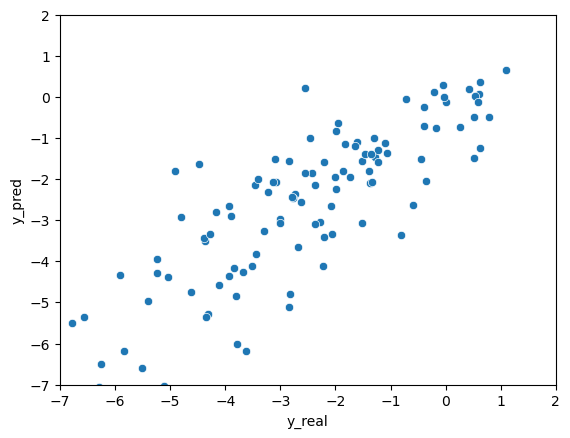

elapsed time: 9.518203735351562
run: 56
{'radius': 4, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F9E44F10>, <torch.utils.data.dataset.Subset object at 0x00000224F8AF6190>, <torch.utils.data.dataset.Subset object at 0x00000224F8AF6D30>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.403448096911112 | Validation Loss 1.4747668504714966
Epoch 10 | Train Loss 0.04685419499874115 | Validation Loss 0.552681028842926
Epoch 20 | Train Loss 0.03889200116197268 | Validation Loss 0.589323565363884
Epoch 30 | Train Loss 0.010330079138899844 | Validation Loss 0.5559478402137756
Epoch 40 | Train Loss 0.004711251907671491 | Validation Loss 0.532057985663414
Epoch 50 | Train Loss 0.020351887308061124 | Validation Loss 0.5337653756141663
Epoch 60 | Train Loss 0.015917820918063322 | Validation Loss 0.5274748653173447
Epoch 70 | Train Loss 0.0203995321256419 | Validation Loss 0.5302442461252213
Epoch 80 | Train Loss 0.005563370371237397 | Validation Loss 0.5086441189050674
Epoch 90 | Train Loss 0.004923878555806975 | Validation Loss 0.5291436612606049
Epoch 100 | Train Loss 0.010489237836251657 | Validation Loss 0.5242631584405899
Epoch 110 | Train Loss 0.021917417676498494 | Validation Loss 0.5277616381645203
Epoch 120 | Train Loss 0.031330227044721444 | Val

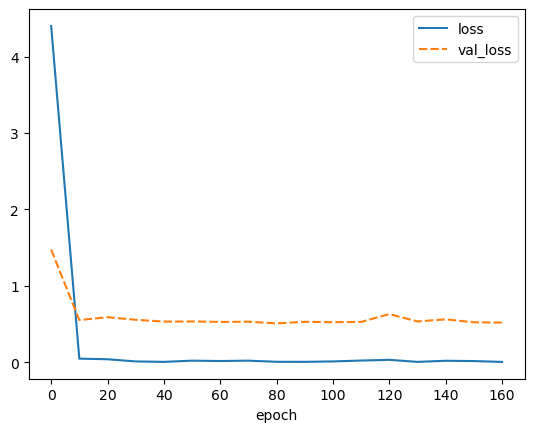

best weights loaded


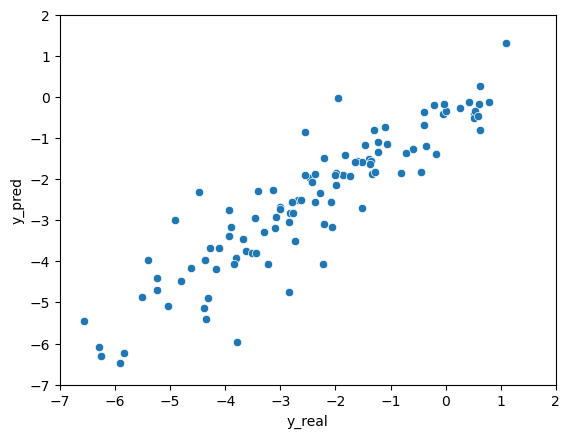

elapsed time: 11.884535074234009
run: 57
{'radius': 4, 'fpSize': 2048, 'linear_layers': [2048], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8C27340>, <torch.utils.data.dataset.Subset object at 0x00000224F8A5D0D0>, <torch.utils.data.dataset.Subset object at 0x00000224F8A5D3D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 6.537569173177084 | Validation Loss 3.6317840814590454
Epoch 10 | Train Loss 0.07152864436308543 | Validation Loss 1.3499685525894165
Epoch 20 | Train Loss 0.028192860695223015 | Validation Loss 1.400109887123108
Epoch 30 | Train Loss 0.02905085732539495 | Validation Loss 1.3699106574058533
Epoch 40 | Train Loss 0.016874876571819186 | Validation Loss 1.3910406231880188
Epoch 50 | Train Loss 0.048397613937656084 | Validation Loss 1.4891853332519531
Epoch 60 | Train Loss 0.017573496202627818 | Validation Loss 1.4996354579925537
Epoch 70 | Train Loss 0.04183446268240611 | Validation Loss 1.4304174184799194
Epoch 80 | Train Loss 0.015781178030495842 | Validation Loss 1.389388620853424
Epoch 90 | Train Loss 0.012761747961242994 | Validation Loss 1.4878390431404114
Epoch 100 | Train Loss 0.018954920582473278 | Validation Loss 1.4665368795394897
Epoch 110 | Train Loss 0.039918427541852 | Validation Loss 1.4267630577087402
Epoch 120 | Train Loss 0.022600223341335855 | Vali

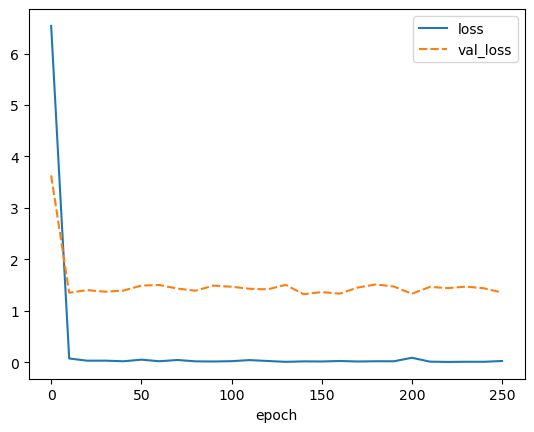

best weights loaded


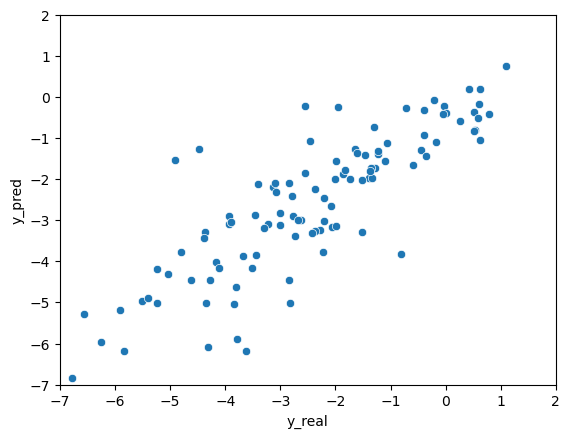

elapsed time: 17.774532079696655
run: 58
{'radius': 4, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002255726E310>, <torch.utils.data.dataset.Subset object at 0x00000224F9E1B100>, <torch.utils.data.dataset.Subset object at 0x00000225573B7940>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.118623459339142 | Validation Loss 2.668998122215271
Epoch 10 | Train Loss 0.09899661888678869 | Validation Loss 0.6270584464073181
Epoch 20 | Train Loss 0.051442692428827284 | Validation Loss 0.5583185106515884
Epoch 30 | Train Loss 0.053925538311402 | Validation Loss 0.6131297051906586
Epoch 40 | Train Loss 0.03577503835161527 | Validation Loss 0.5331387221813202
Epoch 50 | Train Loss 0.003756965013841788 | Validation Loss 0.5566194355487823
Epoch 60 | Train Loss 0.006716691174854835 | Validation Loss 0.5194893926382065
Epoch 70 | Train Loss 0.009703622292727232 | Validation Loss 0.5552295446395874


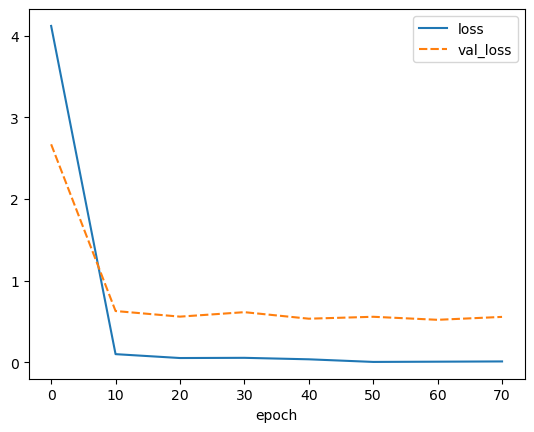

best weights loaded


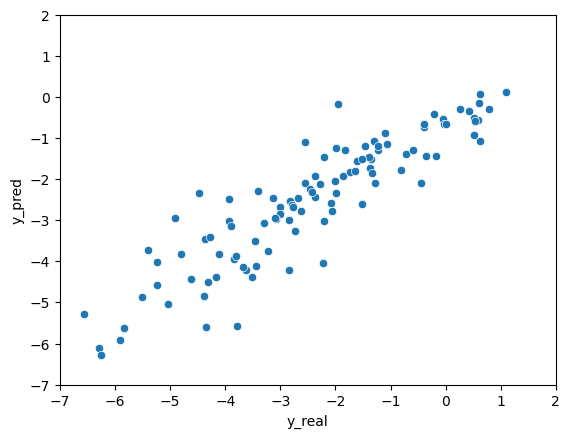

elapsed time: 8.069670915603638
run: 59
{'radius': 4, 'fpSize': 2048, 'linear_layers': [2048, 1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8BF4190>, <torch.utils.data.dataset.Subset object at 0x0000022565354F10>, <torch.utils.data.dataset.Subset object at 0x00000225653549D0>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.7084086259206135 | Validation Loss 3.7913334369659424
Epoch 10 | Train Loss 0.14359896183013915 | Validation Loss 1.3308912515640259
Epoch 20 | Train Loss 0.09518190994858741 | Validation Loss 1.5295024514198303
Epoch 30 | Train Loss 0.06709857707222303 | Validation Loss 1.4932355880737305
Epoch 40 | Train Loss 0.011596385839705665 | Validation Loss 1.3840645551681519
Epoch 50 | Train Loss 0.01266700541600585 | Validation Loss 1.4671958684921265
Epoch 60 | Train Loss 0.04373132089773814 | Validation Loss 1.3951087296009064
Epoch 70 | Train Loss 0.018763689852009217 | Validation Loss 1.4714836478233337
Epoch 80 | Train Loss 0.02278204138080279 | Validation Loss 1.4349352717399597
Epoch 90 | Train Loss 0.1616229772567749 | Validation Loss 1.629022240638733
Epoch 100 | Train Loss 0.04901778697967529 | Validation Loss 1.4635646343231201


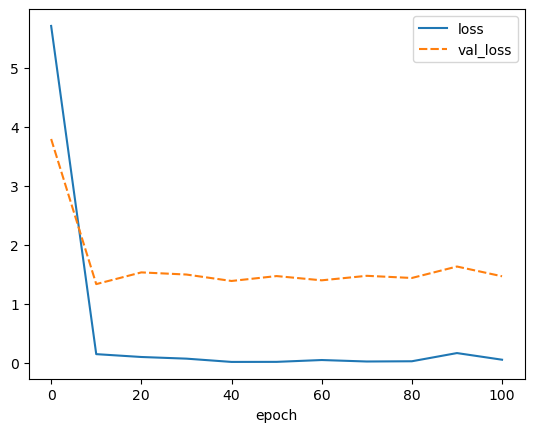

best weights loaded


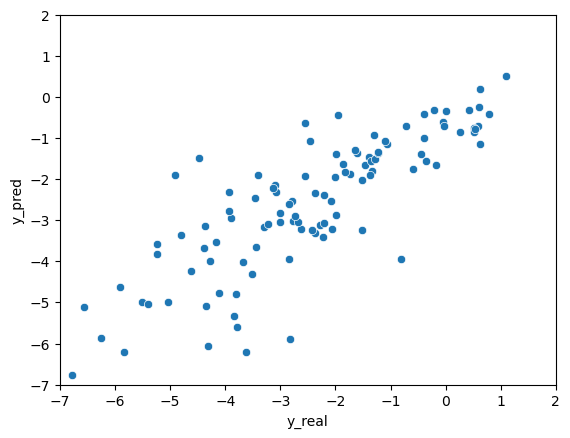

elapsed time: 11.990288734436035
run: 60
{'radius': 4, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022557268A90>, <torch.utils.data.dataset.Subset object at 0x0000022565322430>, <torch.utils.data.dataset.Subset object at 0x0000022565372220>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.586606462796529 | Validation Loss 2.5525834560394287
Epoch 10 | Train Loss 0.09483467588822046 | Validation Loss 0.5681243538856506
Epoch 20 | Train Loss 0.026533269075055918 | Validation Loss 0.6587370932102203
Epoch 30 | Train Loss 0.05578683788577716 | Validation Loss 0.5383521914482117
Epoch 40 | Train Loss 0.058169388025999066 | Validation Loss 0.6600293517112732
Epoch 50 | Train Loss 0.045973062763611475 | Validation Loss 0.5181692689657211
Epoch 60 | Train Loss 0.007098469339932005 | Validation Loss 0.5294421911239624
Epoch 70 | Train Loss 0.007525865299006303 | Validation Loss 0.5578899681568146
Epoch 80 | Train Loss 0.0067074933128121 | Validation Loss 0.5277116447687149
Epoch 90 | Train Loss 0.009113124789049227 | Validation Loss 0.5457491874694824


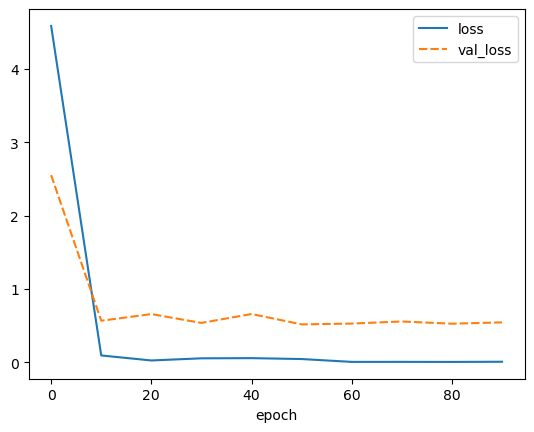

best weights loaded


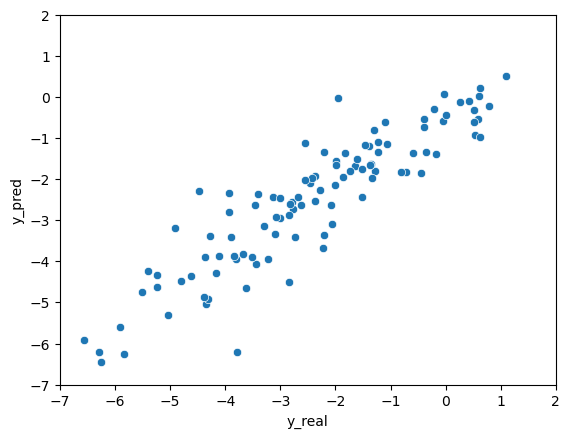

elapsed time: 8.68287467956543
run: 61
{'radius': 4, 'fpSize': 2048, 'linear_layers': [1024, 512], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F85104F0>, <torch.utils.data.dataset.Subset object at 0x0000022565481340>, <torch.utils.data.dataset.Subset object at 0x0000022565492880>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 5.931702836354574 | Validation Loss 3.4893451929092407
Epoch 10 | Train Loss 0.10169284964601198 | Validation Loss 1.295137494802475
Epoch 20 | Train Loss 0.057217268149058025 | Validation Loss 1.407560408115387
Epoch 30 | Train Loss 0.05176036643485228 | Validation Loss 1.489924132823944
Epoch 40 | Train Loss 0.026165801969667276 | Validation Loss 1.3733999133110046
Epoch 50 | Train Loss 0.01183837940916419 | Validation Loss 1.4866825938224792
Epoch 60 | Train Loss 0.029185908536116283 | Validation Loss 1.4754782319068909
Epoch 70 | Train Loss 0.031174829260756574 | Validation Loss 1.3782269954681396
Epoch 80 | Train Loss 0.0895249966531992 | Validation Loss 1.2832084000110626


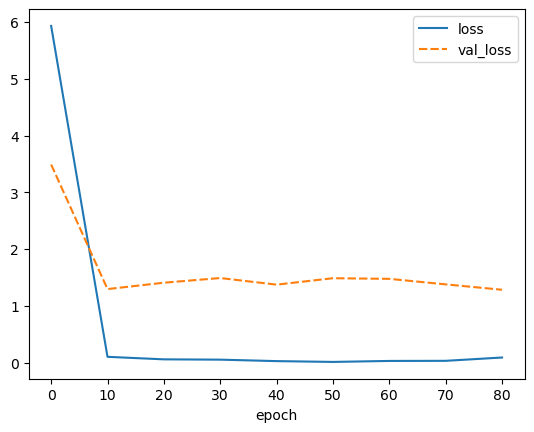

best weights loaded


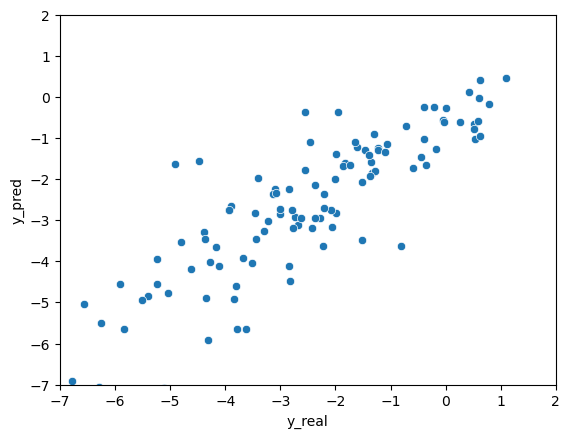

elapsed time: 6.523391485214233
run: 62
{'radius': 4, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': True, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000224F8BE7040>, <torch.utils.data.dataset.Subset object at 0x00000224F8A916A0>, <torch.utils.data.dataset.Subset object at 0x00000224F8A91910>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 4.8528301080067955 | Validation Loss 1.3440184593200684
Epoch 10 | Train Loss 0.06337178411583105 | Validation Loss 0.5755241215229034
Epoch 20 | Train Loss 0.031203932563463845 | Validation Loss 0.5861010551452637
Epoch 30 | Train Loss 0.024767546604077022 | Validation Loss 0.6120508313179016
Epoch 40 | Train Loss 0.06273239298413197 | Validation Loss 0.5591911375522614
Epoch 50 | Train Loss 0.008425732733060916 | Validation Loss 0.5298964977264404
Epoch 60 | Train Loss 0.01104614290719231 | Validation Loss 0.5757998526096344
Epoch 70 | Train Loss 0.0070559461135417225 | Validation Loss 0.5381895154714584
Epoch 80 | Train Loss 0.006459014660989245 | Validation Loss 0.5521370470523834
Epoch 90 | Train Loss 0.01316549169520537 | Validation Loss 0.5452299565076828
Epoch 100 | Train Loss 0.0067086462086687485 | Validation Loss 0.5283125042915344


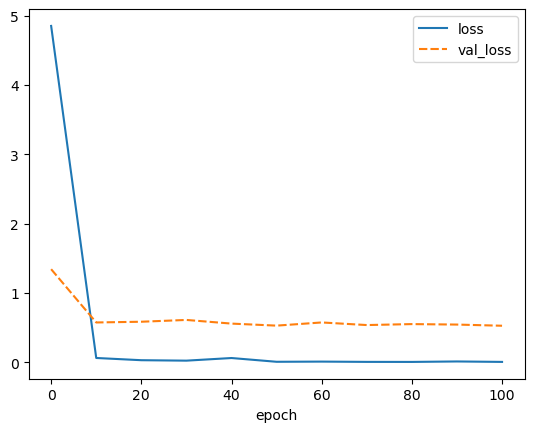

best weights loaded


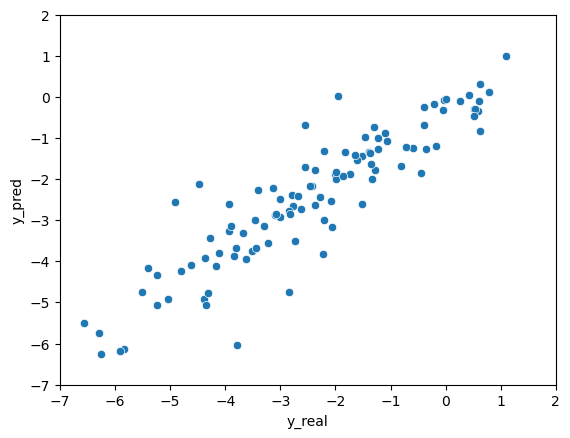

elapsed time: 7.382987976074219
run: 63
{'radius': 4, 'fpSize': 2048, 'linear_layers': [1024], 'create_count_fp': False, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000022557393D00>, <torch.utils.data.dataset.Subset object at 0x000002255FA17130>, <torch.utils.data.dataset.Subset object at 0x000002255FA17640>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 | Train Loss 7.192035992940267 | Validation Loss 4.774495601654053
Epoch 10 | Train Loss 0.18254062036673227 | Validation Loss 1.576535940170288
Epoch 20 | Train Loss 0.033282782137393954 | Validation Loss 1.5707815289497375
Epoch 30 | Train Loss 0.02132520655480524 | Validation Loss 1.6589377522468567
Epoch 40 | Train Loss 0.018767779444654784 | Validation Loss 1.652927279472351
Epoch 50 | Train Loss 0.01136527933801214 | Validation Loss 1.6493635177612305
Epoch 60 | Train Loss 0.019821466288218896 | Validation Loss 1.6121682822704315
Epoch 70 | Train Loss 0.015153925182918708 | Validation Loss 1.5209386944770813
Epoch 80 | Train Loss 0.0250561631595095 | Validation Loss 1.437722772359848
Epoch 90 | Train Loss 0.018594093962262075 | Validation Loss 1.4197742938995361
Epoch 100 | Train Loss 0.03169251523601512 | Validation Loss 1.4941285848617554
Epoch 110 | Train Loss 0.02412914050122102 | Validation Loss 1.3913885653018951
Epoch 120 | Train Loss 0.009178702118030438 | Validat

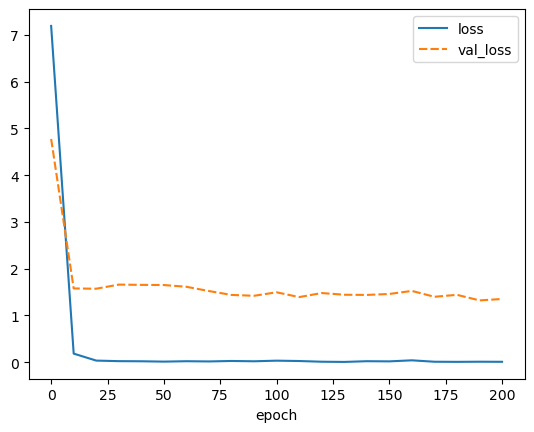

best weights loaded


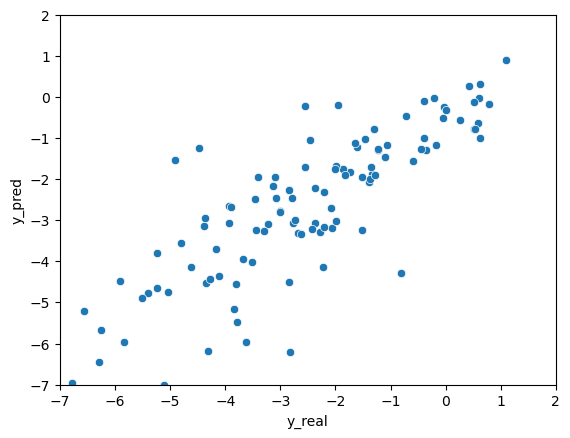

elapsed time: 12.357826232910156


In [13]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()

    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 



    if create_new_data:
        data, data_y = load_esol()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, apply_scaffold_split = apply_scaffold_split )
        loader, test_loader, val_loader = create_dataloader(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_reg_esol.pkl'
        else: 
            loader_file = 'datasets_reg_esol.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders


        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(morgan_data_val, 
                                    batch_size=batch_size, shuffle=True)

        else:
            loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)

        mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)


    plt.show()
    
    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp
        
    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    